In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [9]:
df= pd.read_csv("C:\\Users\\Home\\Downloads\\covid_19_data.csv")
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

In [10]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [11]:
df.fillna('NA')

Date              State         Country  Confirmed  Deaths  \
0       01/22/2020              Anhui  Mainland China        1.0     0.0   
1       01/22/2020            Beijing  Mainland China       14.0     0.0   
2       01/22/2020          Chongqing  Mainland China        6.0     0.0   
3       01/22/2020             Fujian  Mainland China        1.0     0.0   
4       01/22/2020              Gansu  Mainland China        0.0     0.0   
...            ...                ...             ...        ...     ...   
306424  05/29/2021  Zaporizhia Oblast         Ukraine   102641.0  2335.0   
306425  05/29/2021            Zeeland     Netherlands    29147.0   245.0   
306426  05/29/2021           Zhejiang  Mainland China     1364.0     1.0   
306427  05/29/2021    Zhytomyr Oblast         Ukraine    87550.0  1738.0   
306428  05/29/2021       Zuid-Holland     Netherlands   391559.0  4252.0   

        Recovered  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0  
...           ...  
306424    95289.0  
306425        0.0  
306426     1324.0  
306427    83790.0  
306428        0.0  

[306429 rows x 6 columns]

In [12]:
df.head()

Date      State         Country  Confirmed  Deaths  Recovered
0  01/22/2020      Anhui  Mainland China        1.0     0.0        0.0
1  01/22/2020    Beijing  Mainland China       14.0     0.0        0.0
2  01/22/2020  Chongqing  Mainland China        6.0     0.0        0.0
3  01/22/2020     Fujian  Mainland China        1.0     0.0        0.0
4  01/22/2020      Gansu  Mainland China        0.0     0.0        0.0

In [15]:
df.rename(columns={'ObservationDate':'Date','Province/State':'Province','Country/Region':'Country'},inplace=True)

In [13]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [18]:
df3 = df2.groupby(['Country', 'Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index(drop=False)
print(df3.head(20))


            Country        Date Confirmed  Deaths Recovered
0        Azerbaijan  02/28/2020       1.0     0.0       0.0
1   ('St. Martin',)  03/10/2020       2.0     0.0       0.0
2       Afghanistan  01/01/2021   51526.0  2191.0   41727.0
3       Afghanistan  01/02/2021   51526.0  2191.0   41727.0
4       Afghanistan  01/03/2021   51526.0  2191.0   41727.0
5       Afghanistan  01/04/2021   53011.0  2237.0   42530.0
6       Afghanistan  01/05/2021   53105.0  2244.0   42666.0
7       Afghanistan  01/06/2021   53105.0  2244.0   42666.0
8       Afghanistan  01/07/2021   53207.0  2253.0   43291.0
9       Afghanistan  01/08/2021   53332.0  2257.0   43440.0
10      Afghanistan  01/09/2021   53400.0  2264.0   43740.0
11      Afghanistan  01/10/2021   53489.0  2277.0   43948.0
12      Afghanistan  01/11/2021   53538.0  2288.0   44137.0
13      Afghanistan  01/12/2021   53584.0  2301.0   44608.0
14      Afghanistan  01/13/2021   53584.0  2301.0   44850.0
15      Afghanistan  01/14/2021   53775.

In [19]:
df3 = df2.groupby(['Country', 'Date'])[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
print(df3.head(20))


            Country        Date Confirmed  Deaths Recovered
0        Azerbaijan  02/28/2020       1.0     0.0       0.0
1   ('St. Martin',)  03/10/2020       2.0     0.0       0.0
2       Afghanistan  01/01/2021   51526.0  2191.0   41727.0
3       Afghanistan  01/02/2021   51526.0  2191.0   41727.0
4       Afghanistan  01/03/2021   51526.0  2191.0   41727.0
5       Afghanistan  01/04/2021   53011.0  2237.0   42530.0
6       Afghanistan  01/05/2021   53105.0  2244.0   42666.0
7       Afghanistan  01/06/2021   53105.0  2244.0   42666.0
8       Afghanistan  01/07/2021   53207.0  2253.0   43291.0
9       Afghanistan  01/08/2021   53332.0  2257.0   43440.0
10      Afghanistan  01/09/2021   53400.0  2264.0   43740.0
11      Afghanistan  01/10/2021   53489.0  2277.0   43948.0
12      Afghanistan  01/11/2021   53538.0  2288.0   44137.0
13      Afghanistan  01/12/2021   53584.0  2301.0   44608.0
14      Afghanistan  01/13/2021   53584.0  2301.0   44850.0
15      Afghanistan  01/14/2021   53775.

In [21]:
countries = df3['Country'].unique()
len(countries)

229

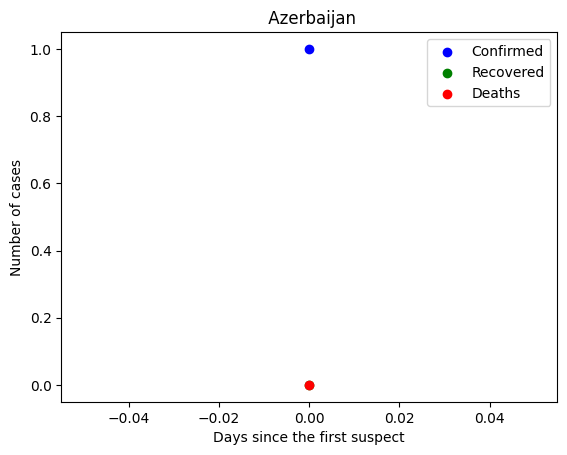

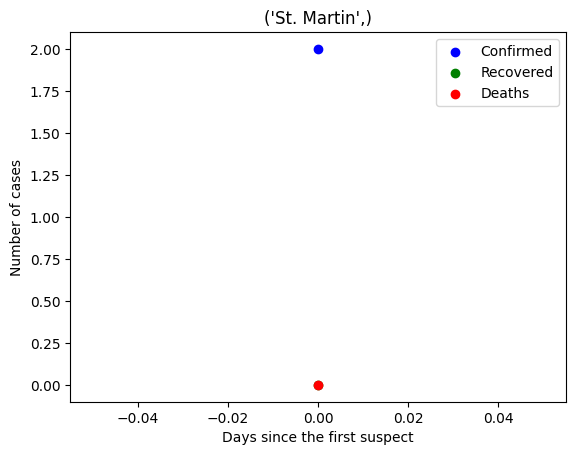

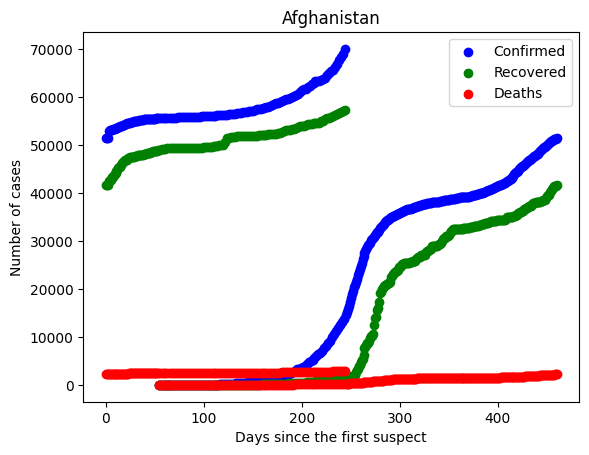

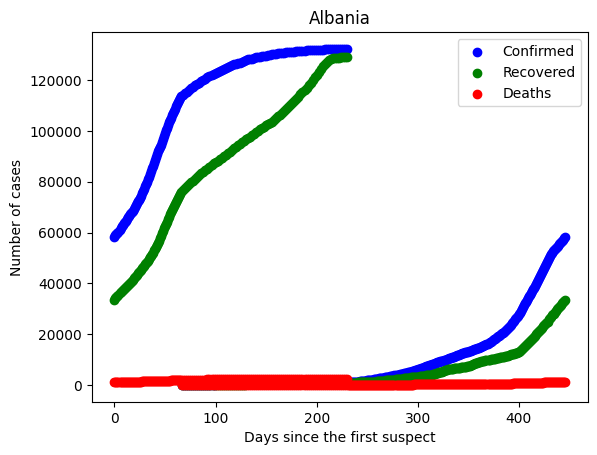

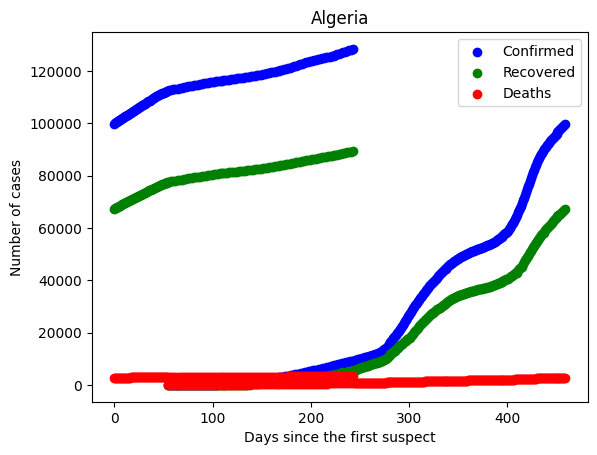

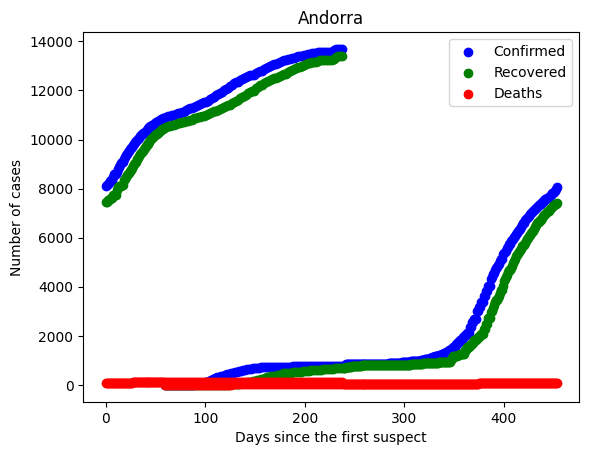

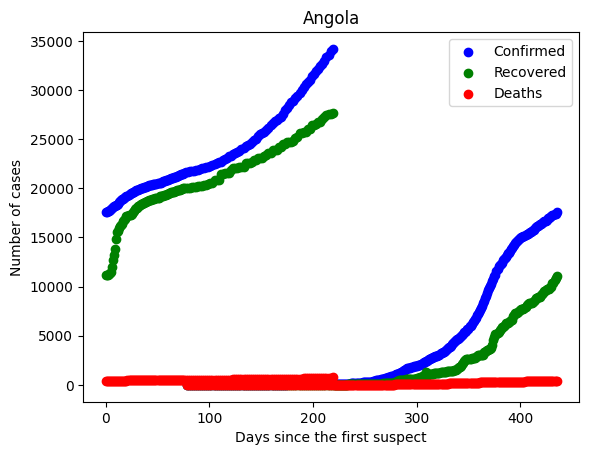

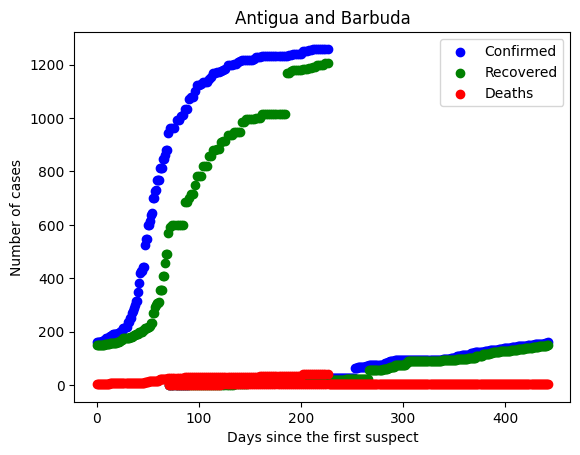

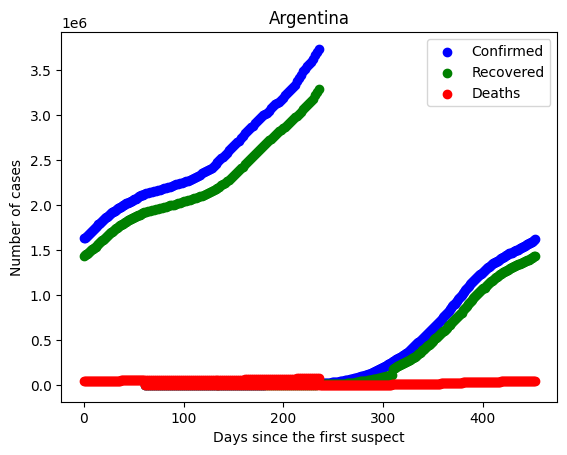

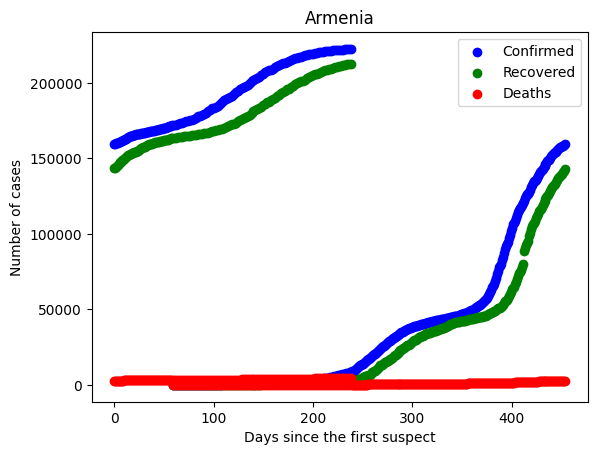

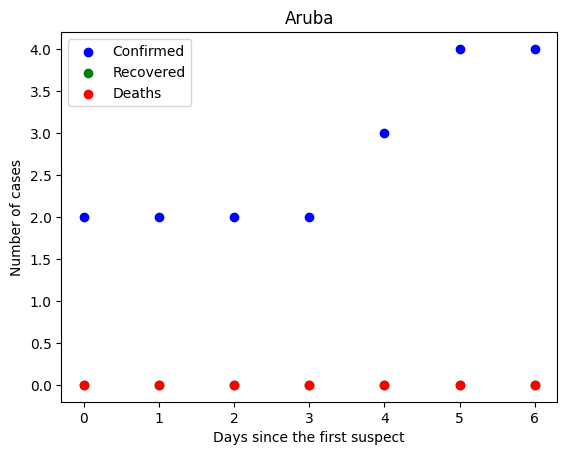

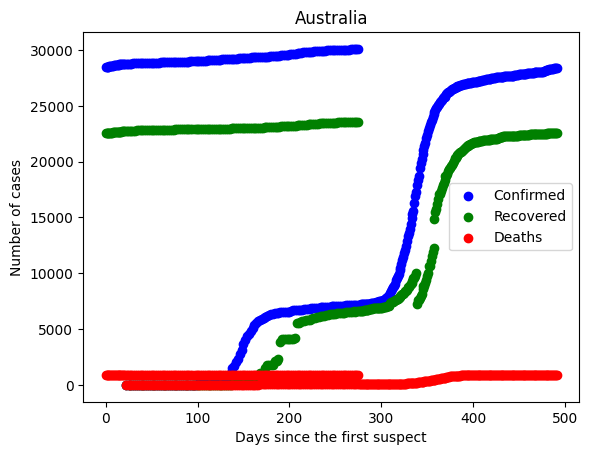

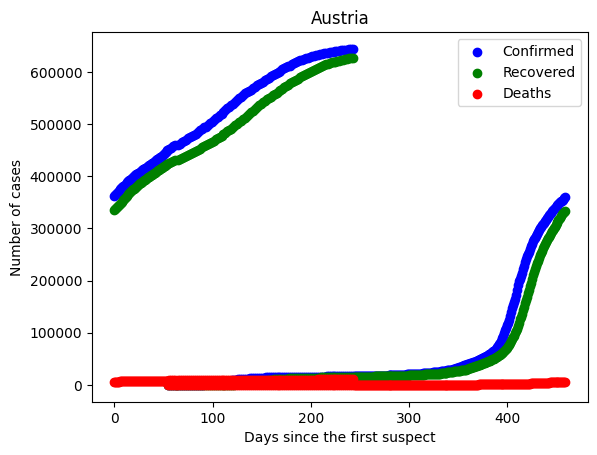

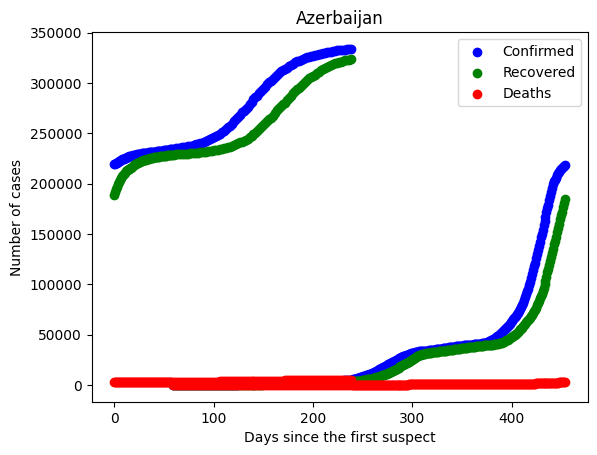

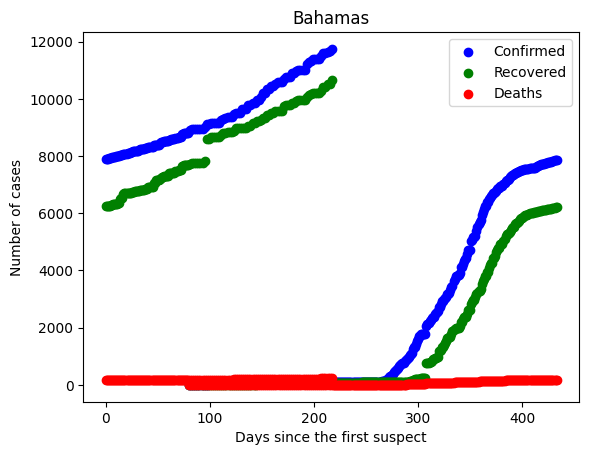

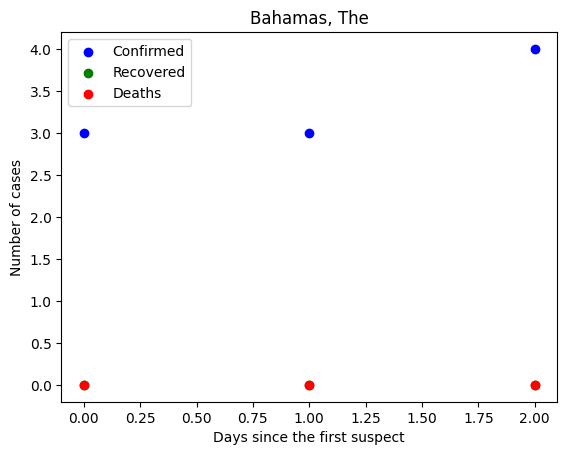

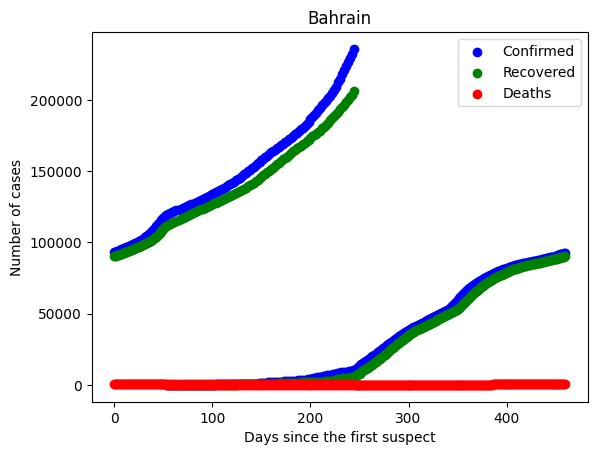

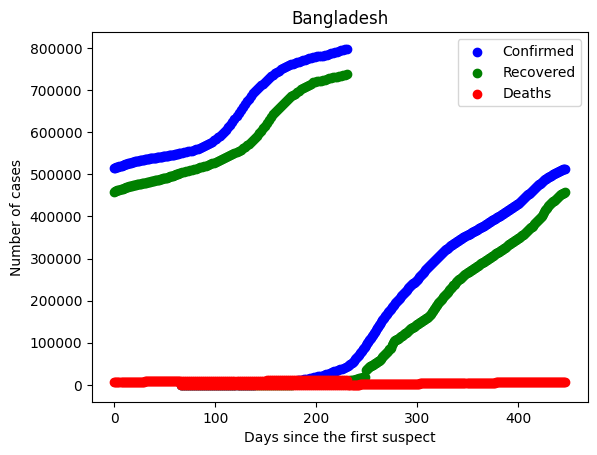

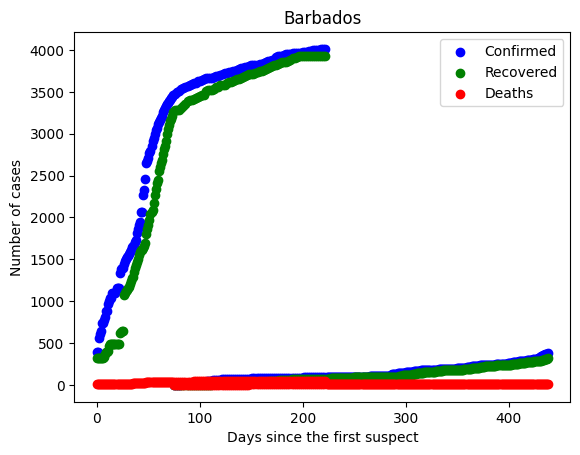

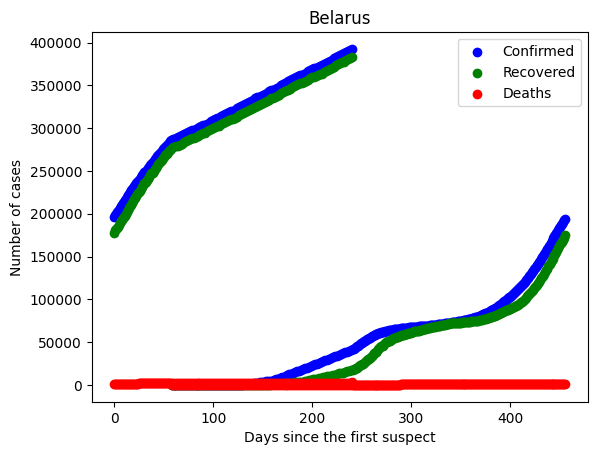

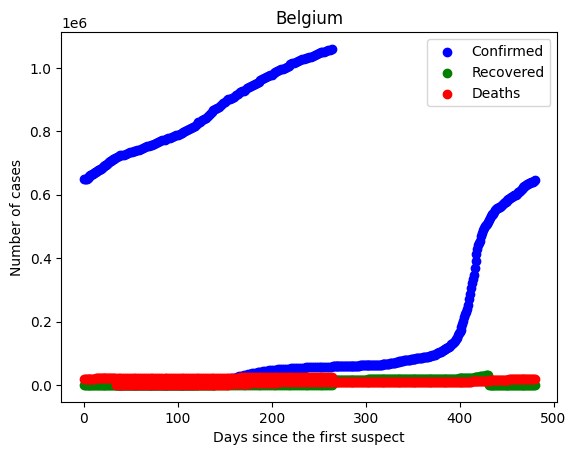

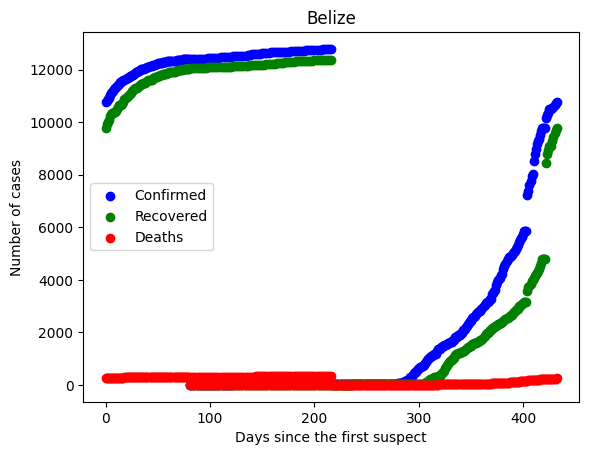

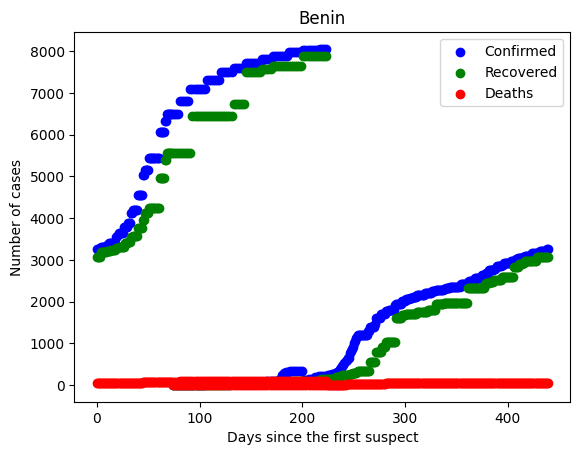

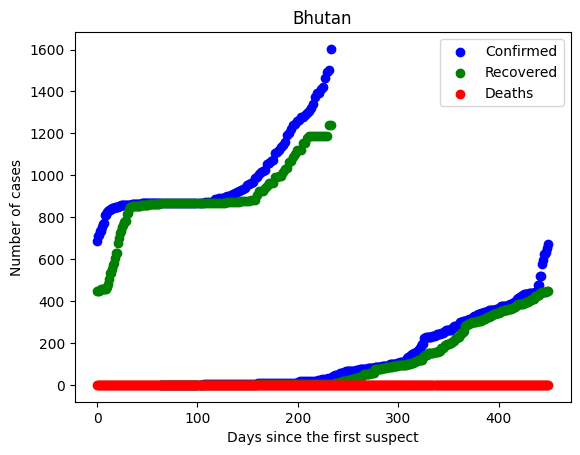

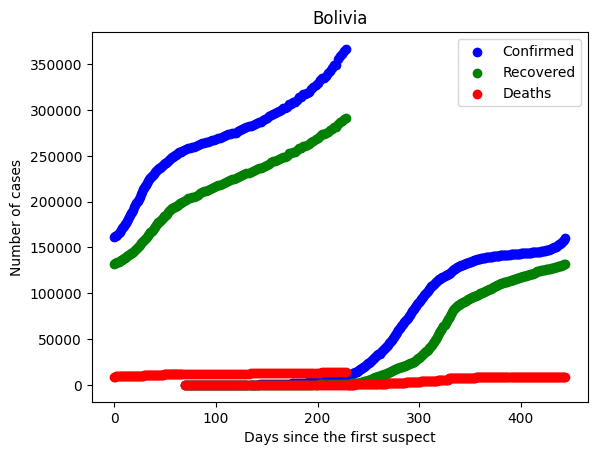

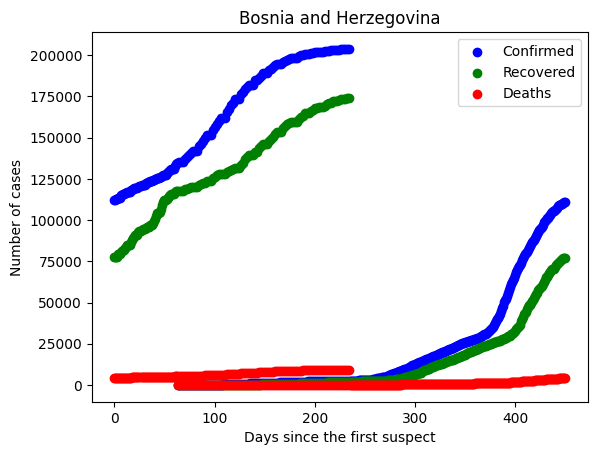

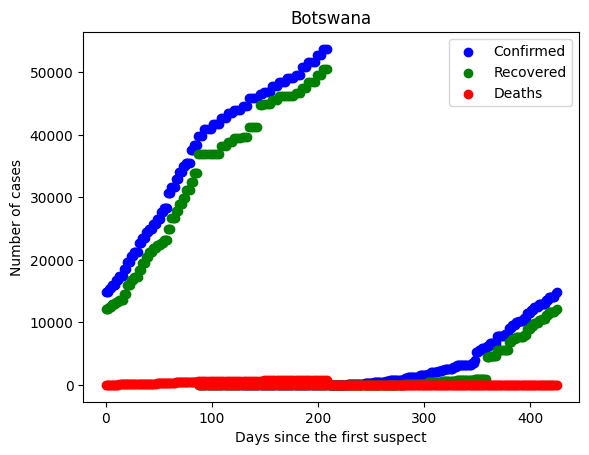

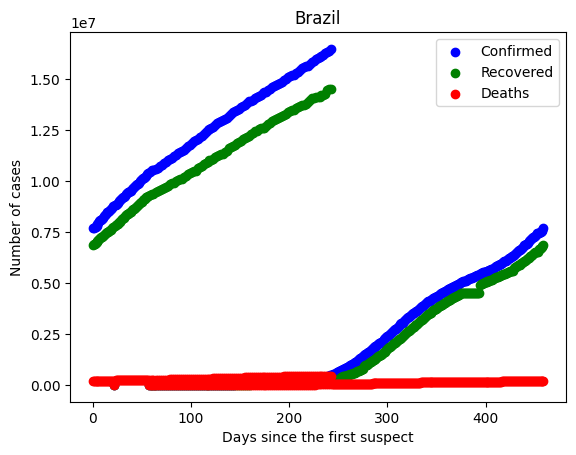

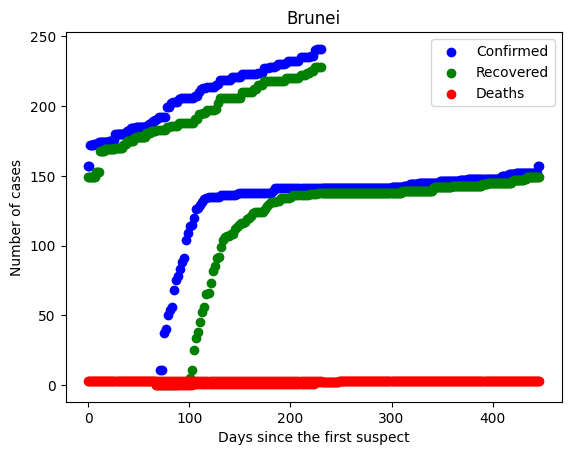

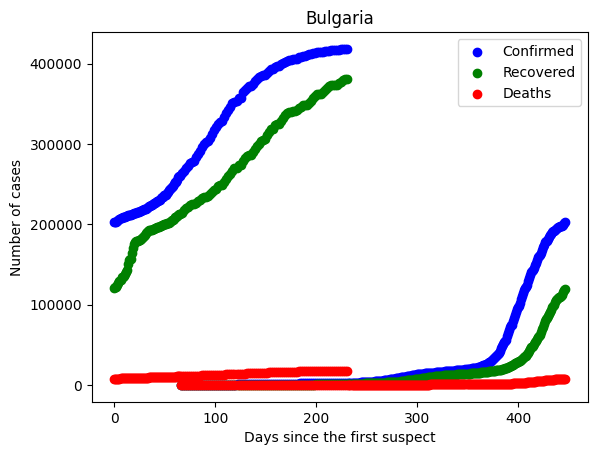

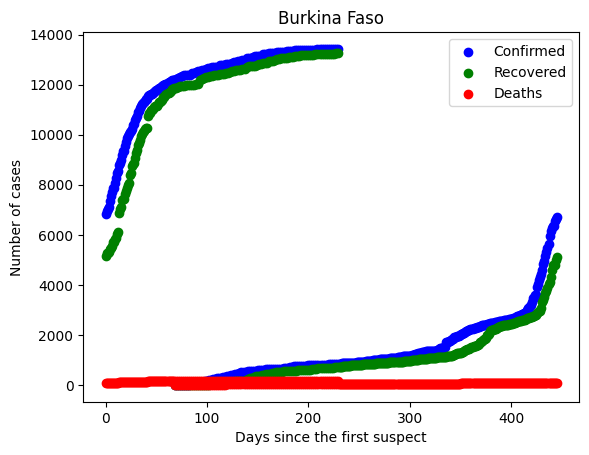

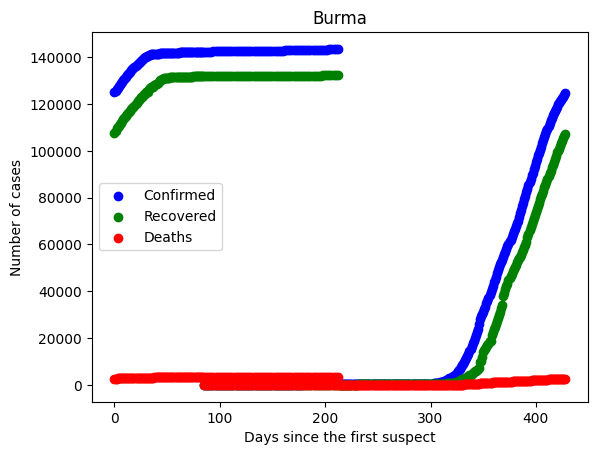

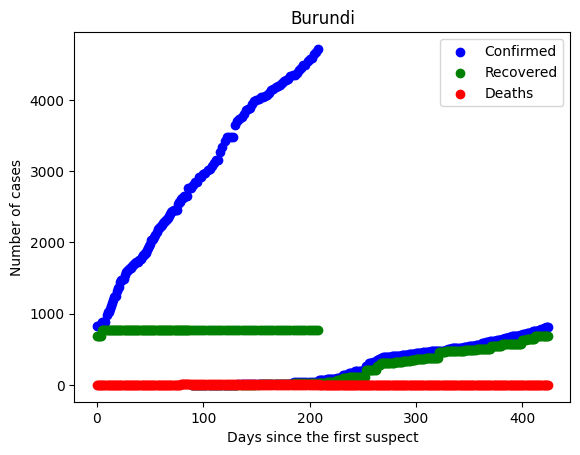

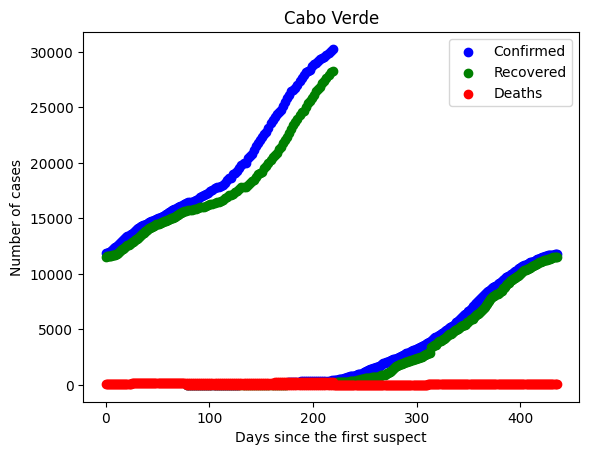

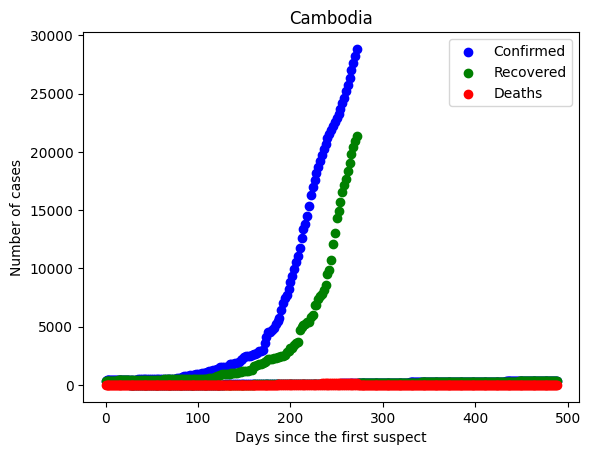

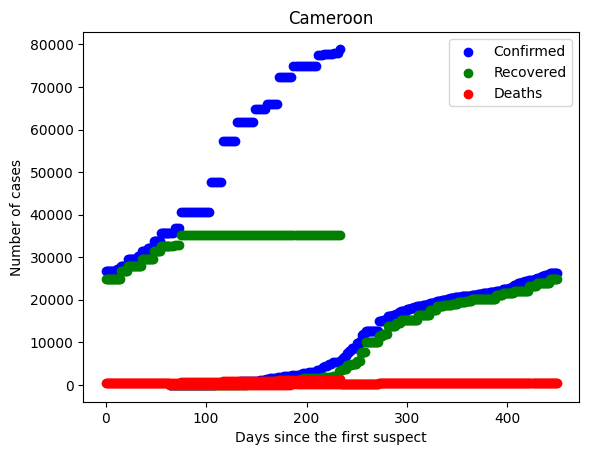

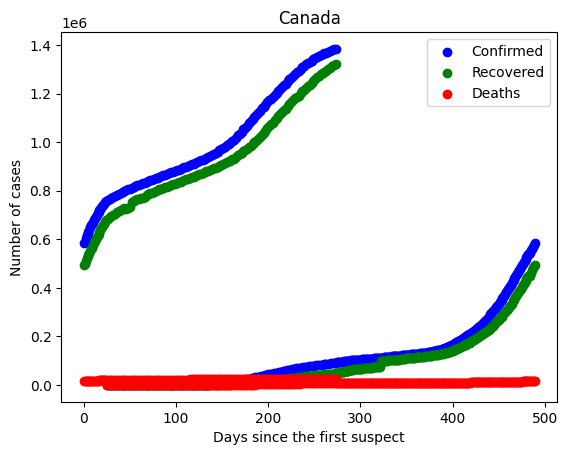

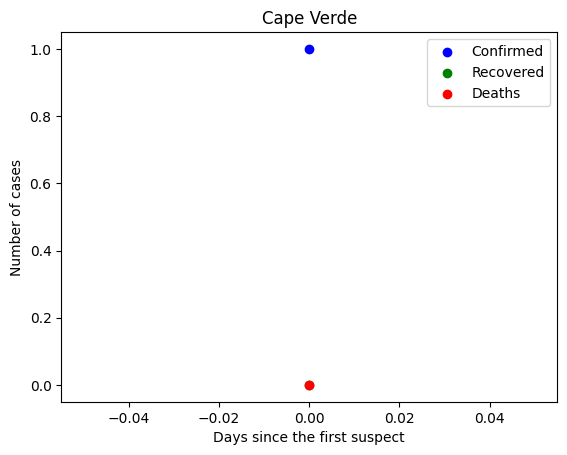

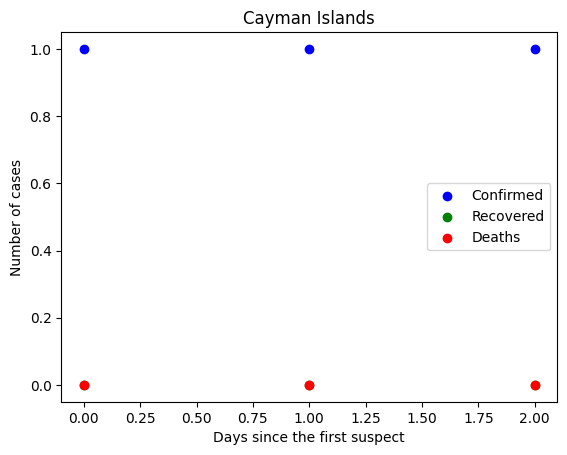

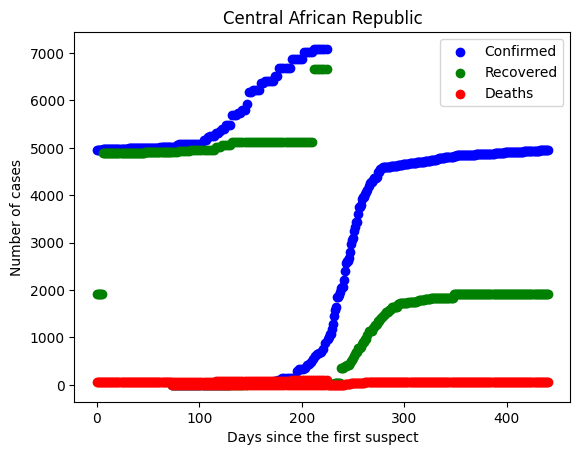

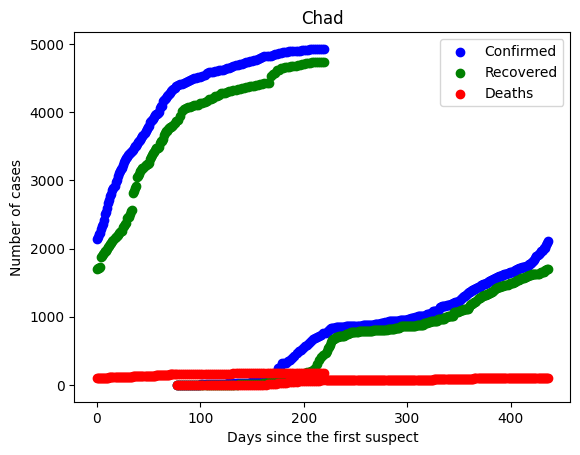

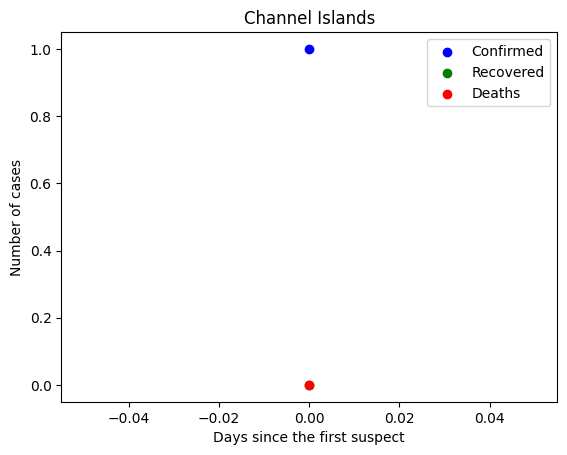

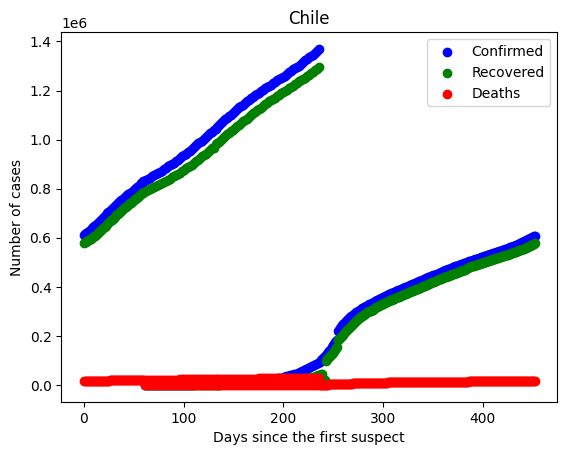

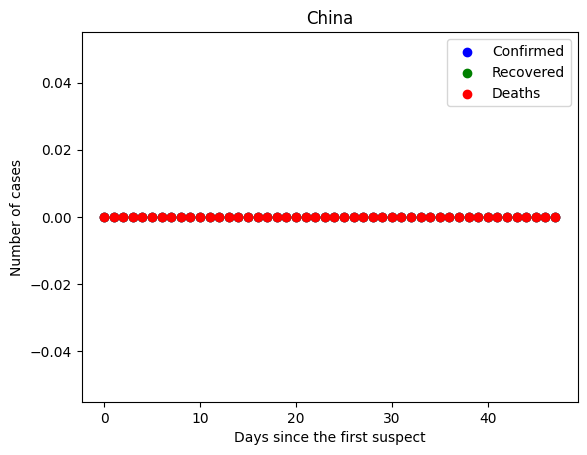

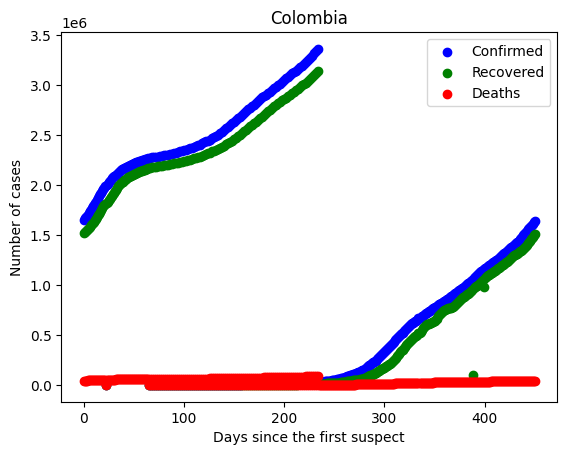

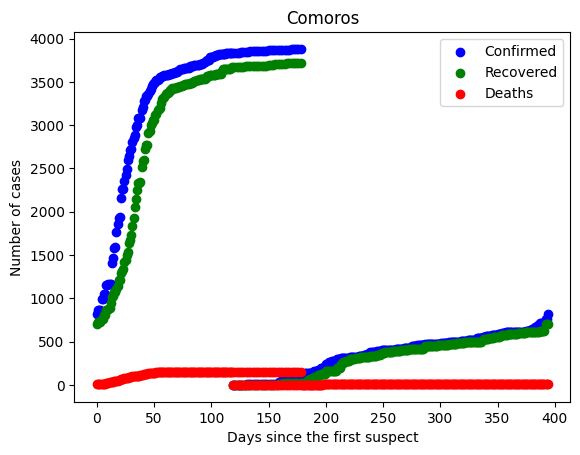

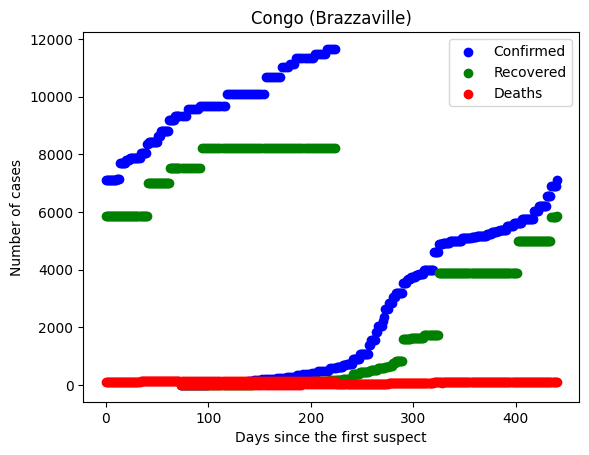

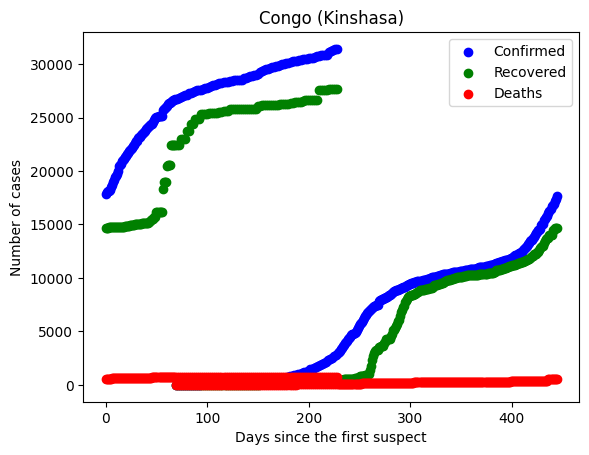

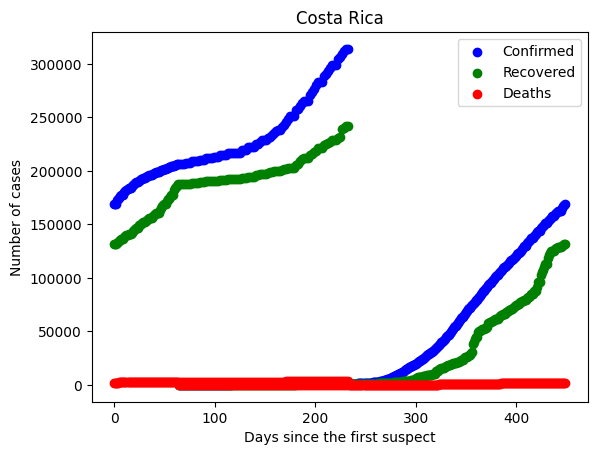

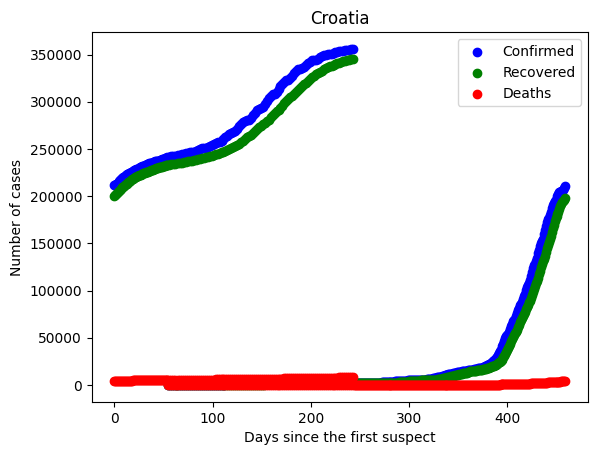

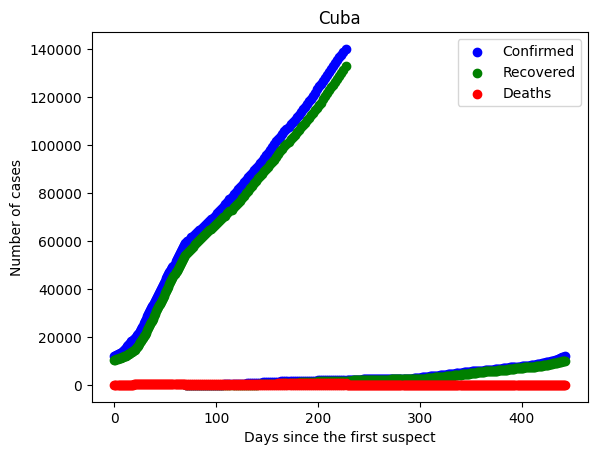

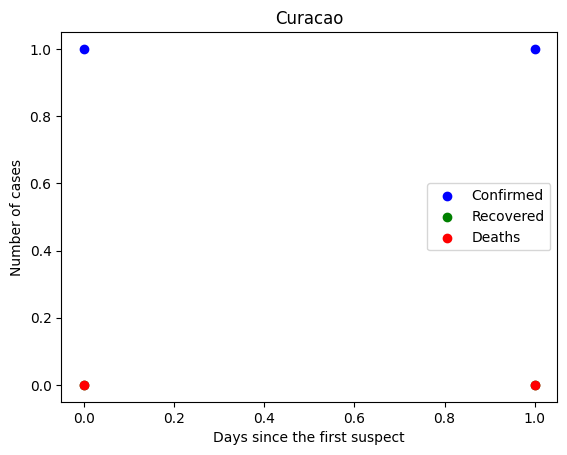

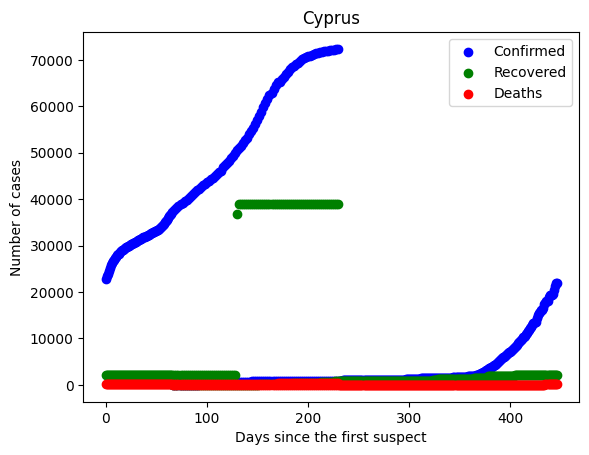

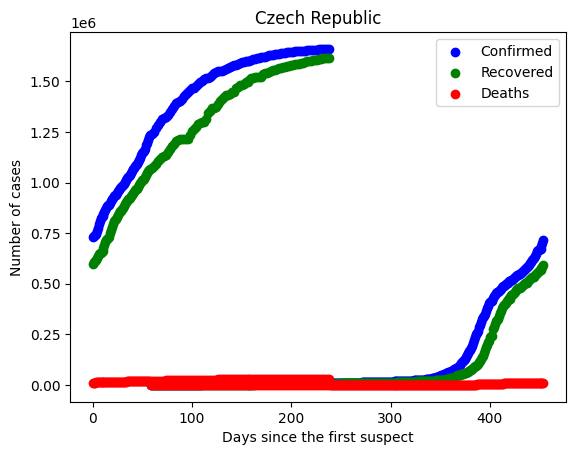

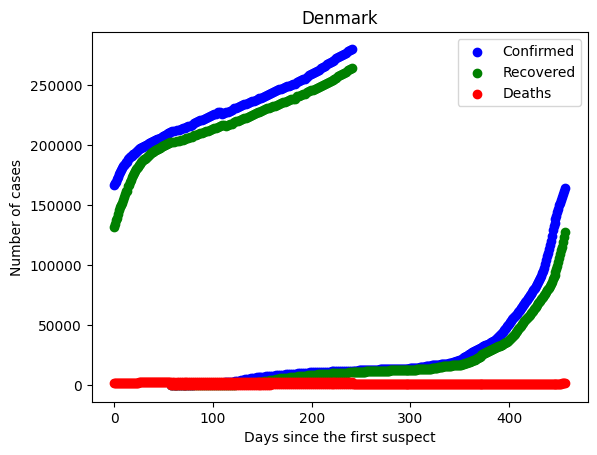

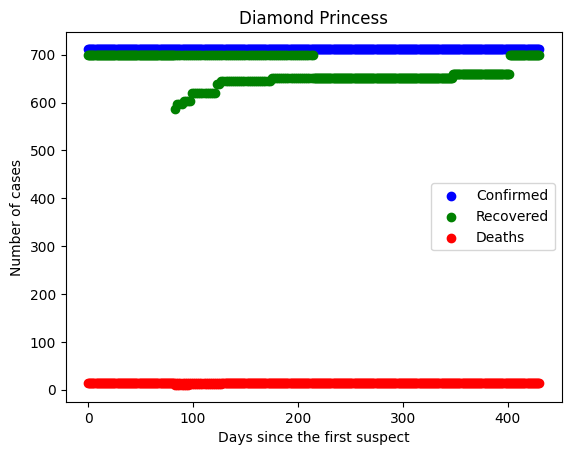

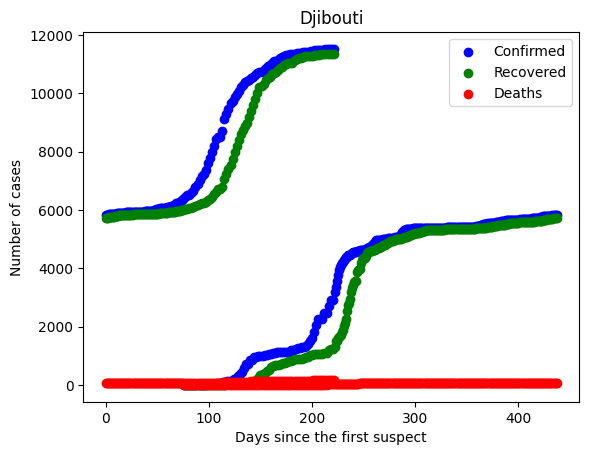

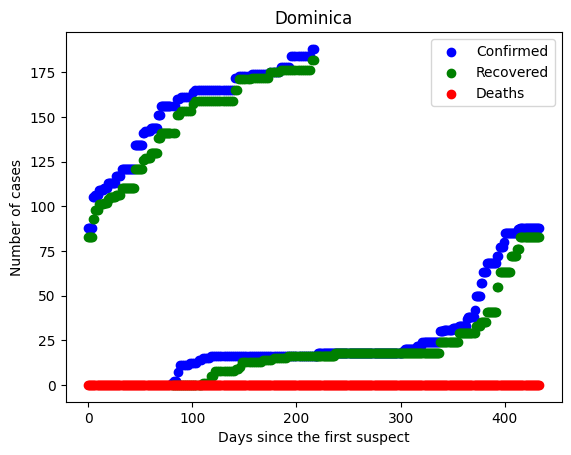

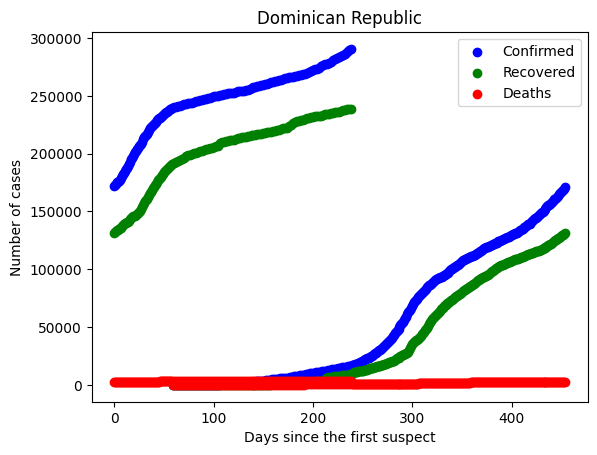

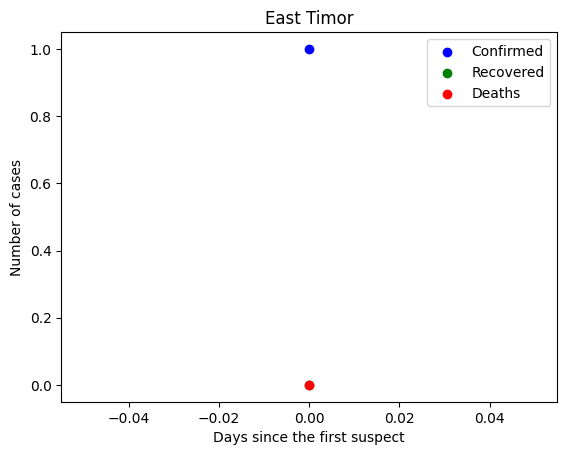

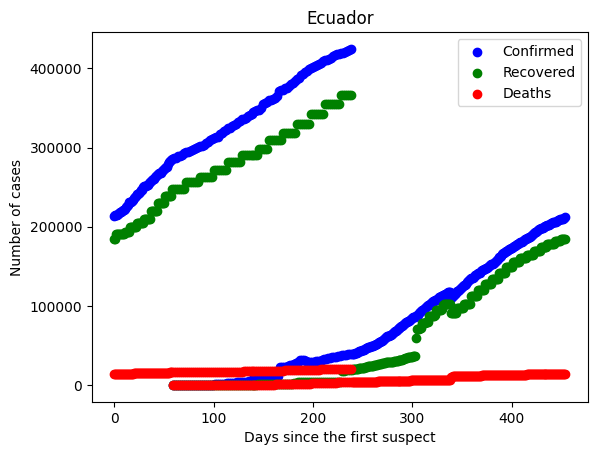

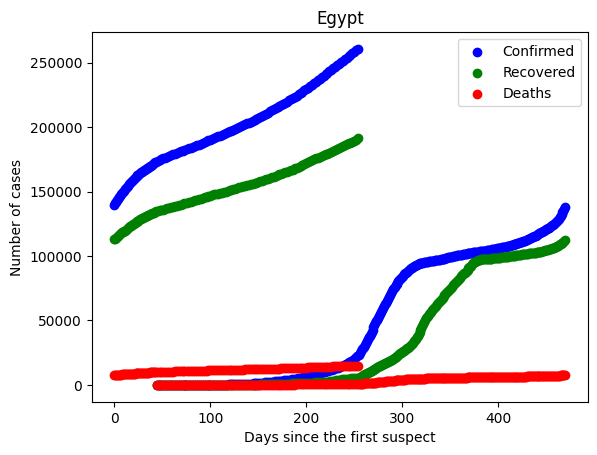

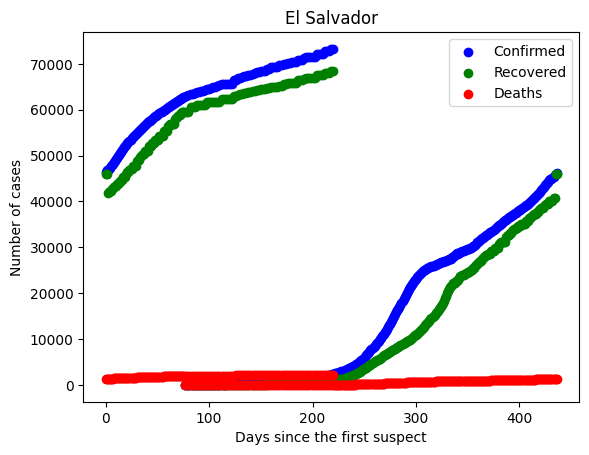

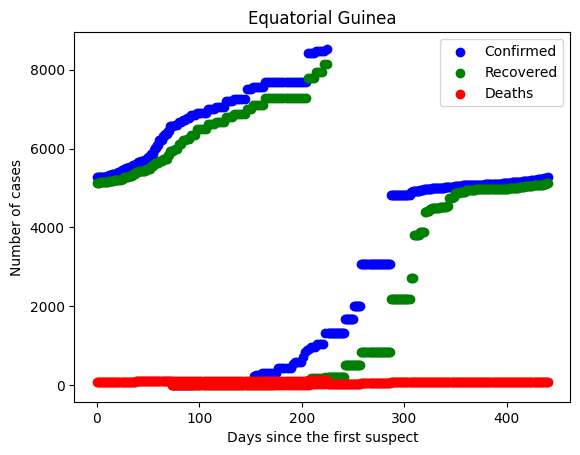

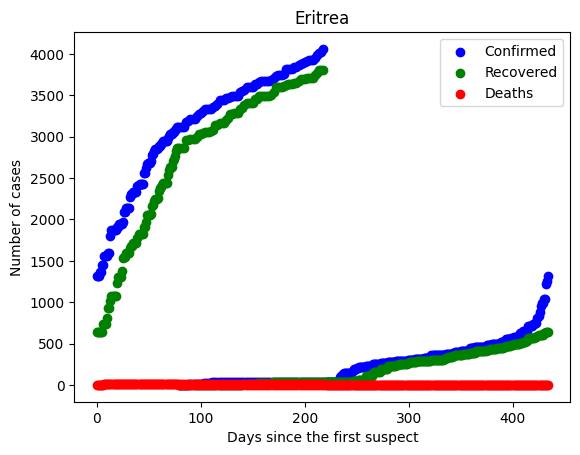

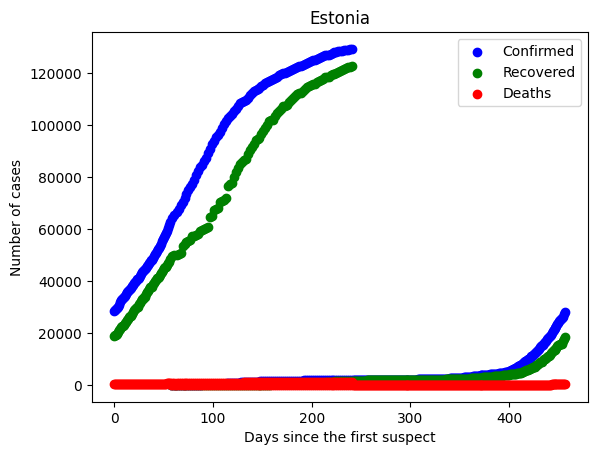

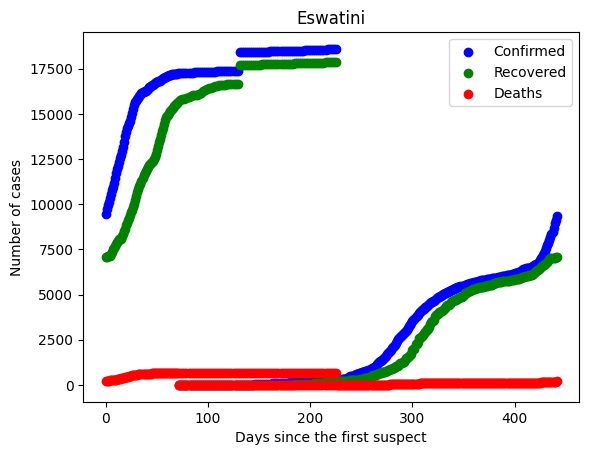

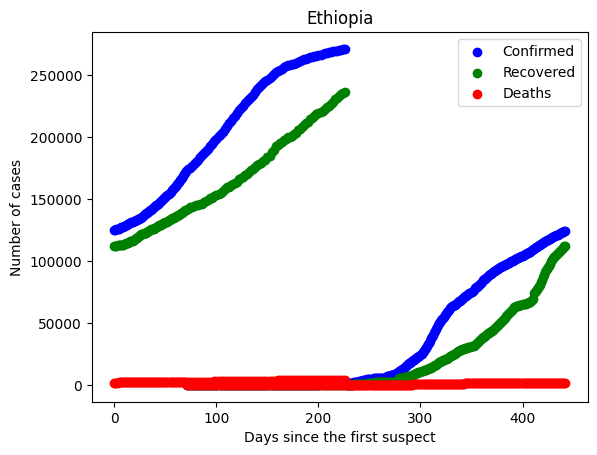

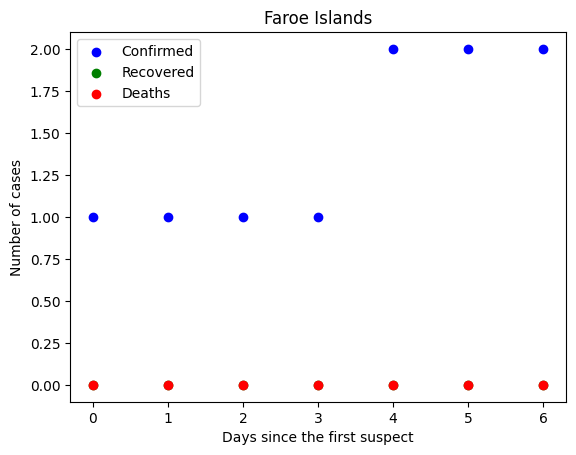

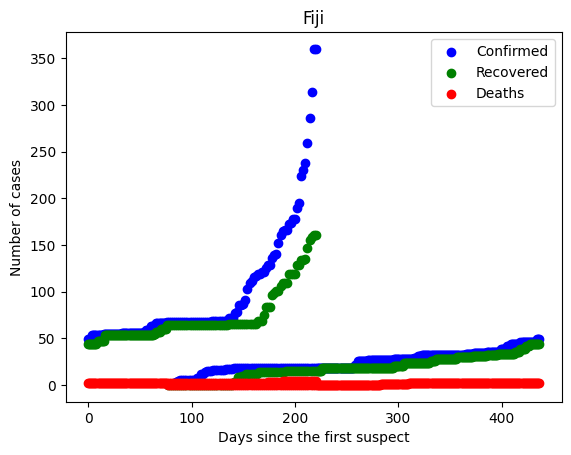

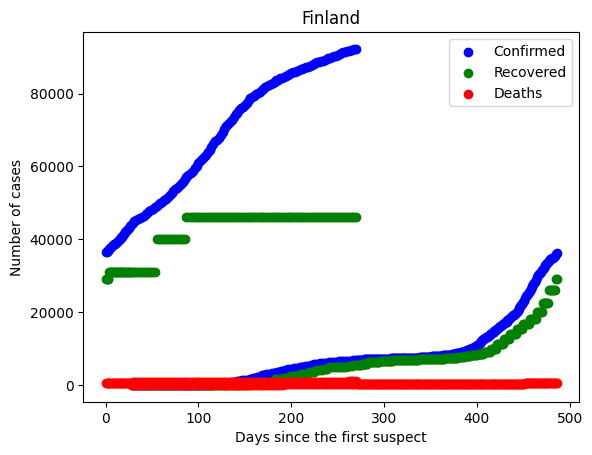

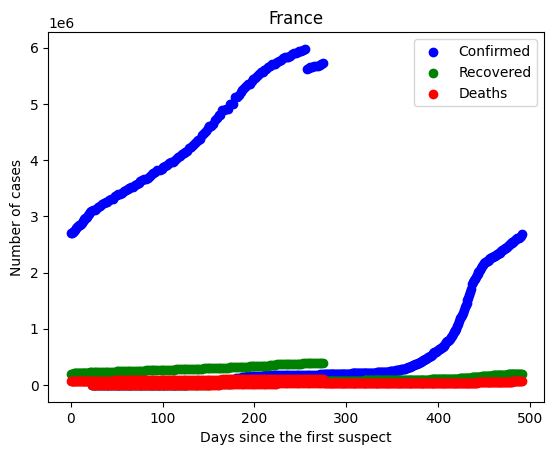

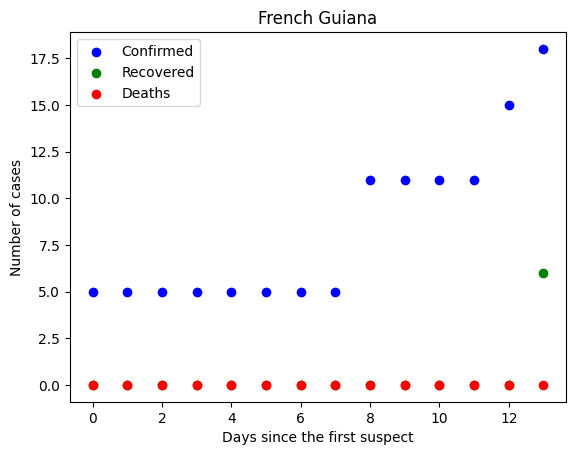

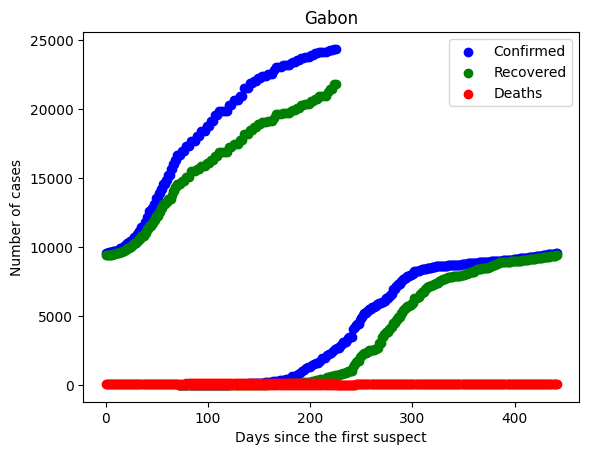

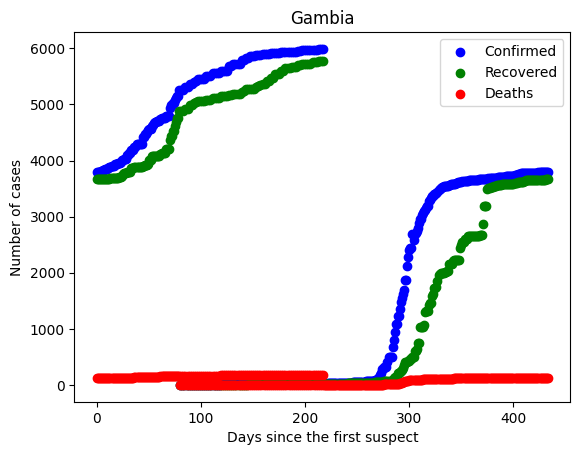

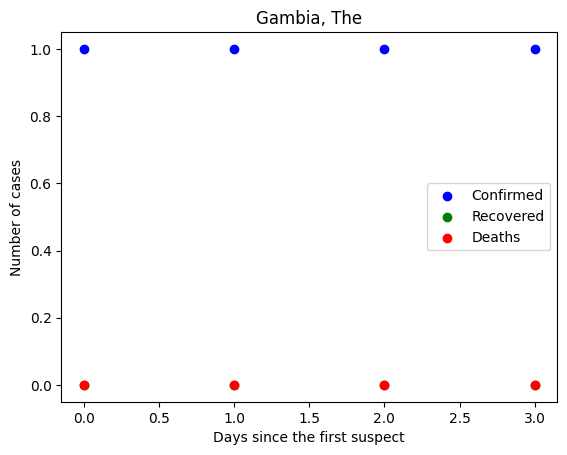

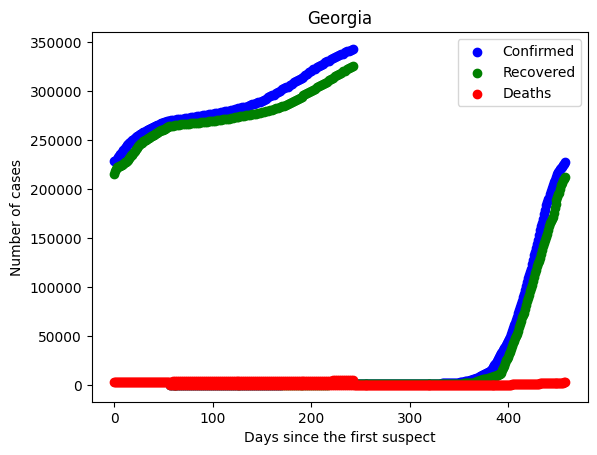

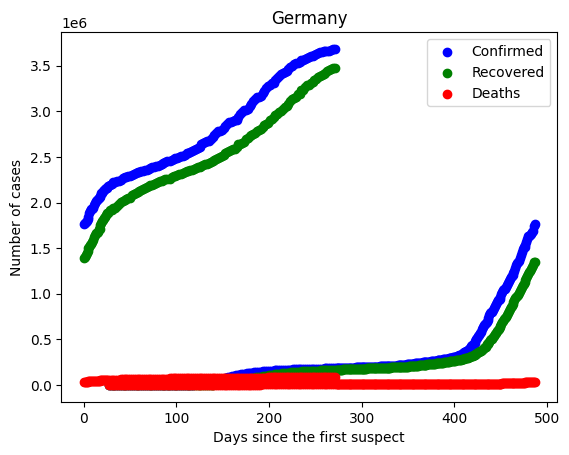

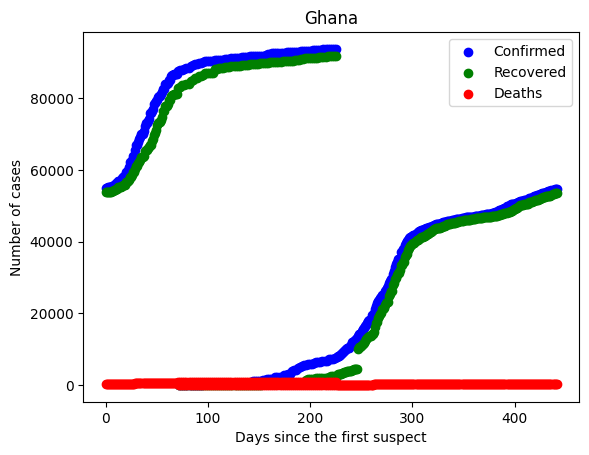

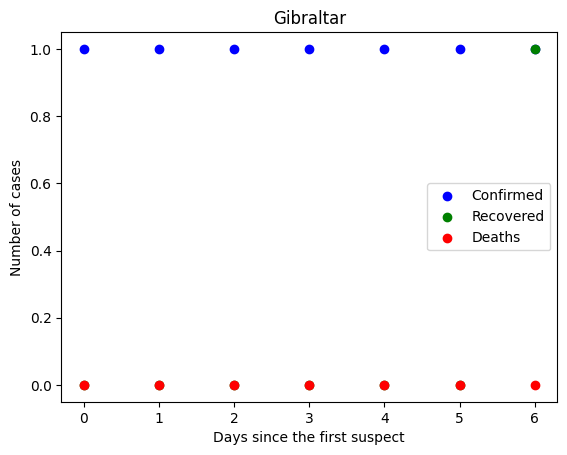

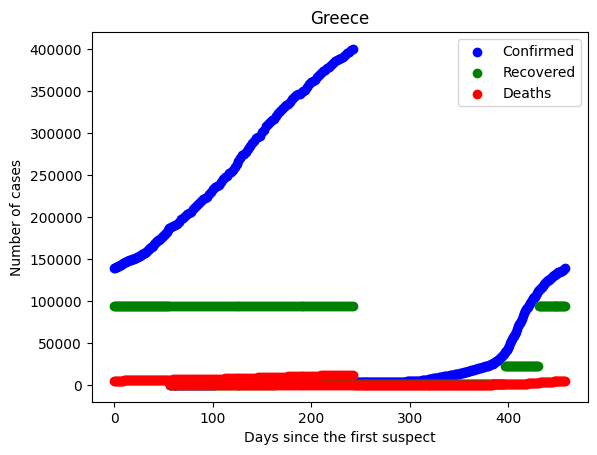

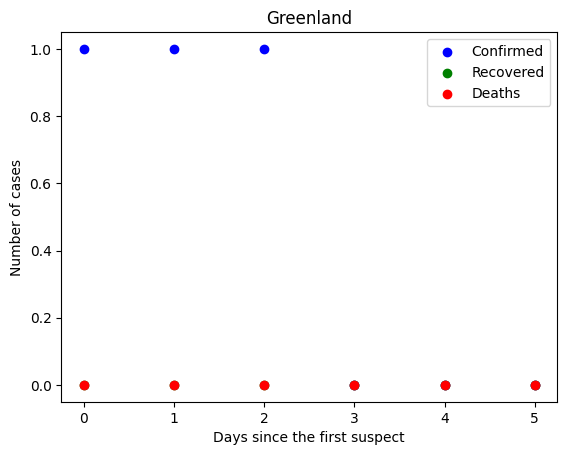

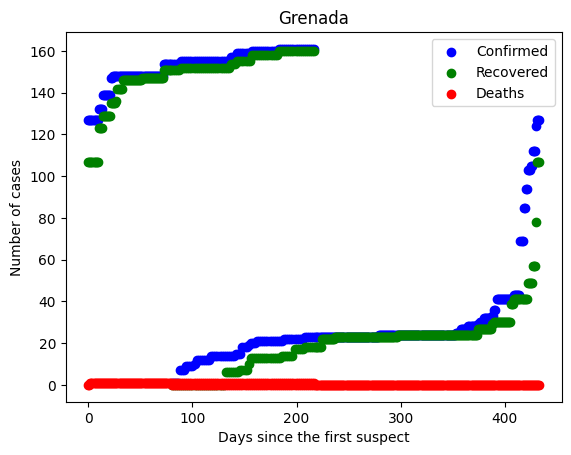

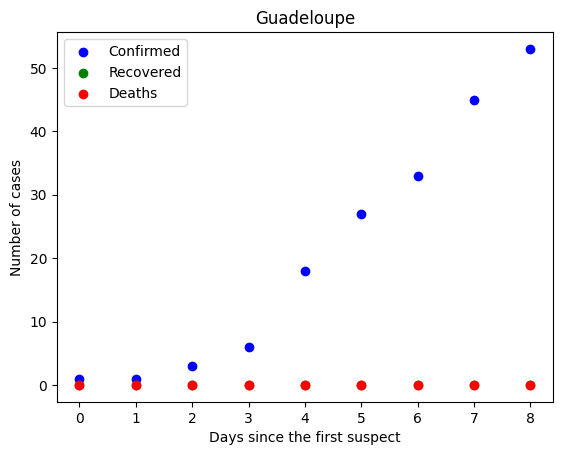

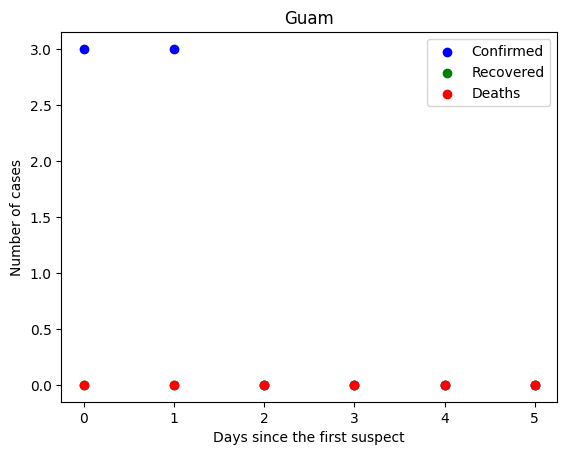

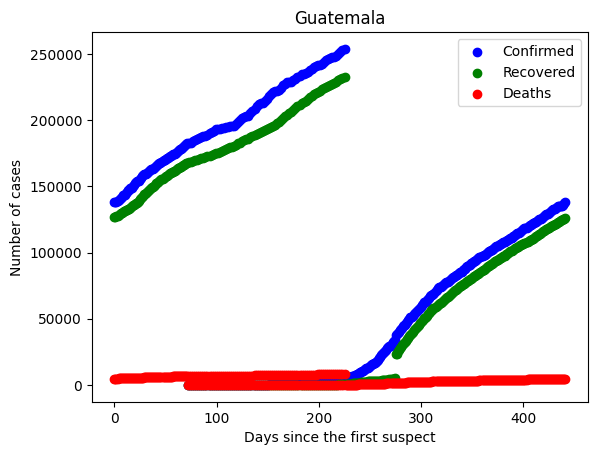

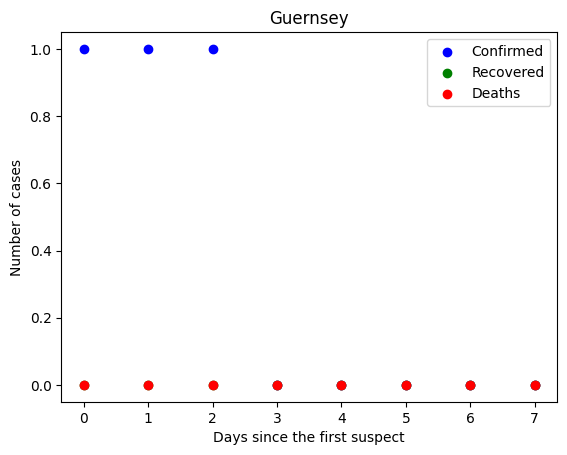

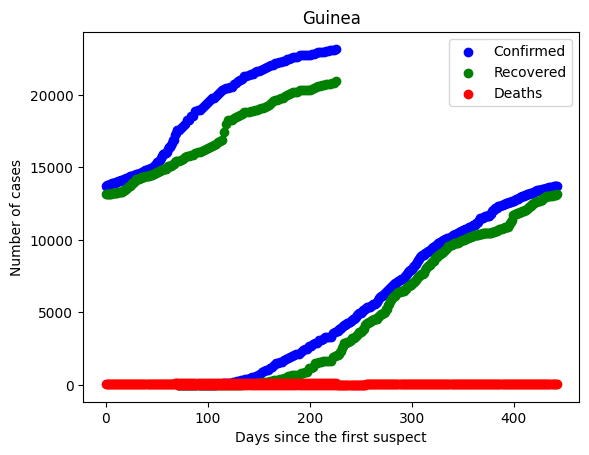

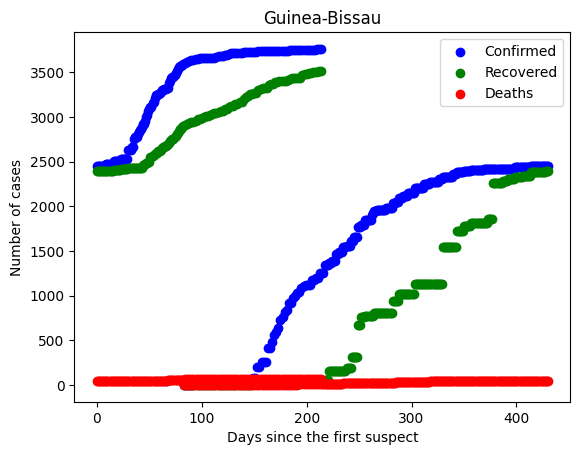

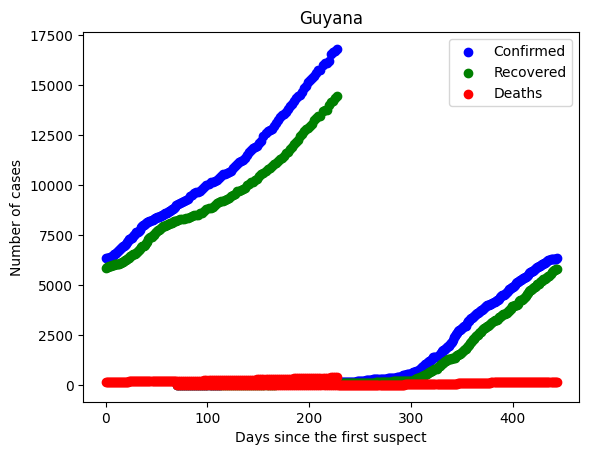

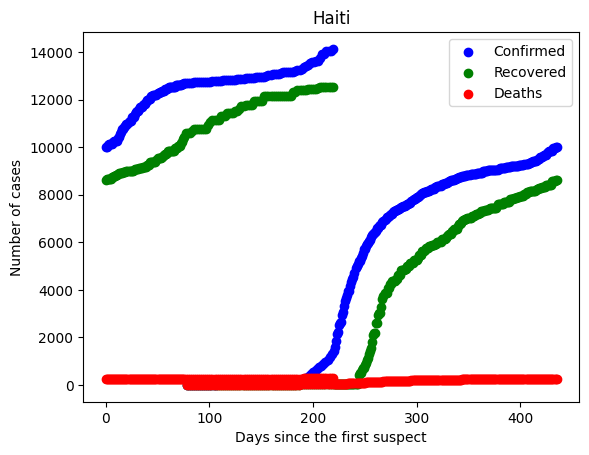

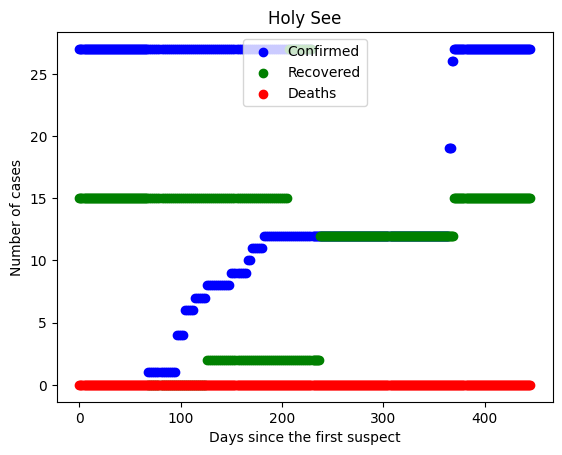

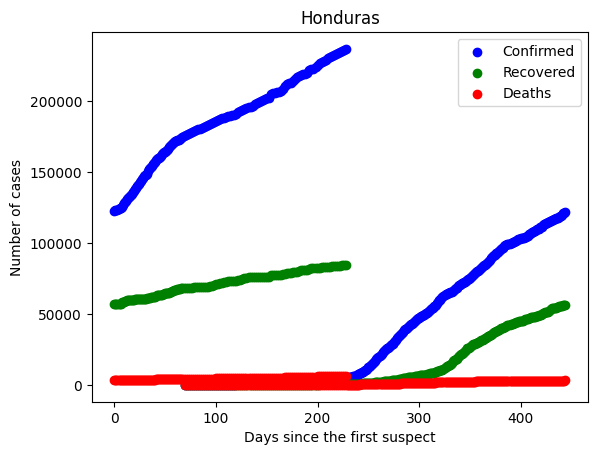

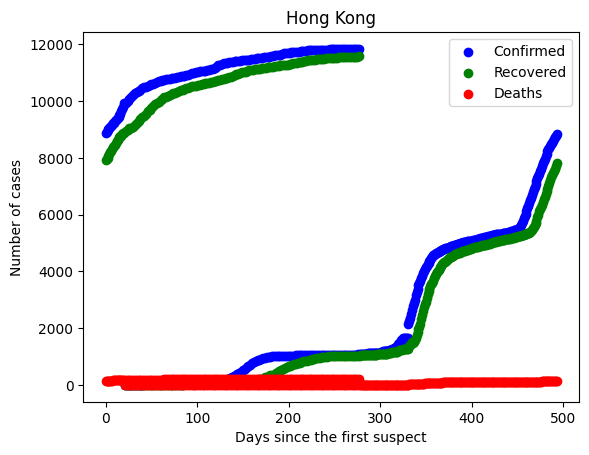

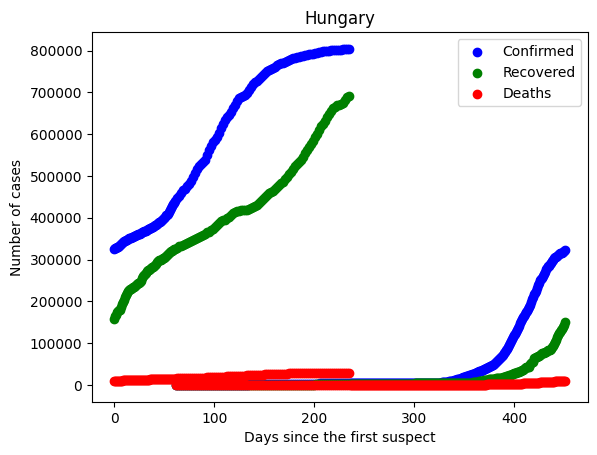

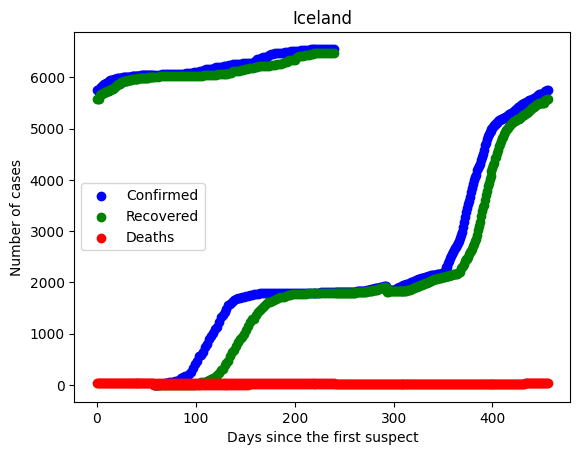

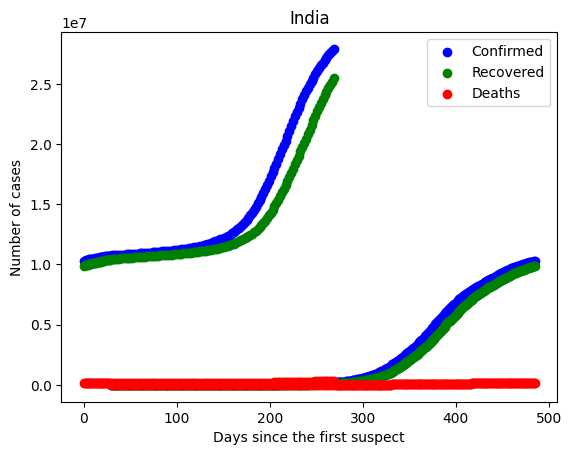

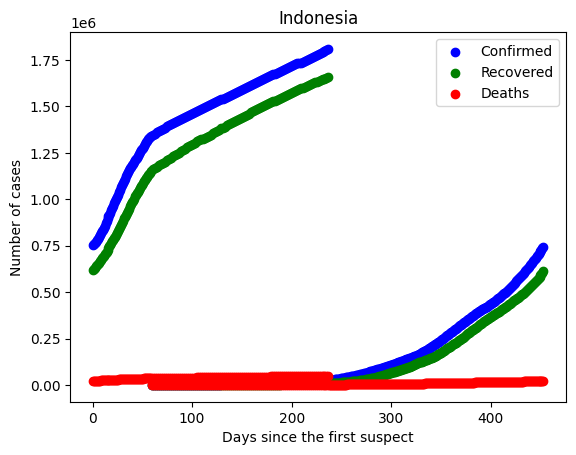

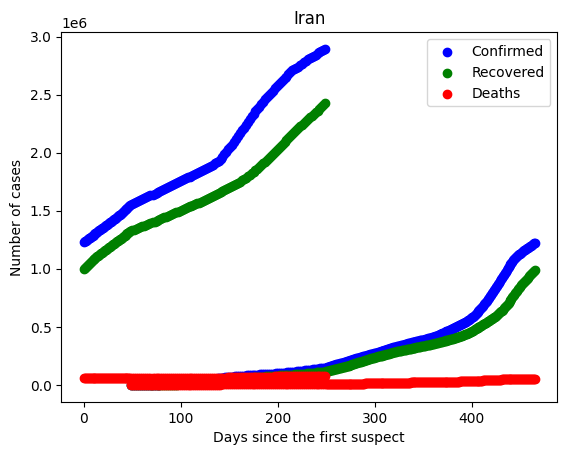

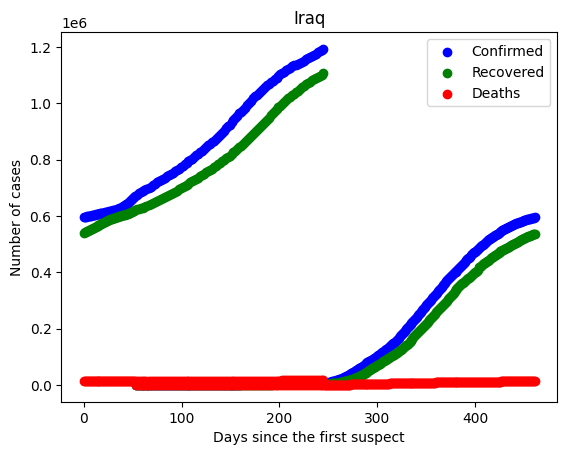

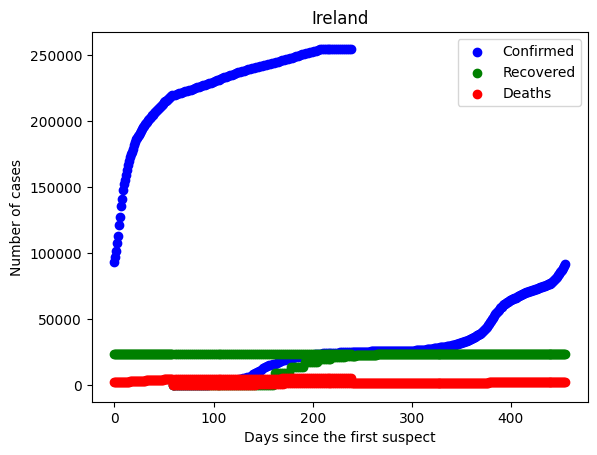

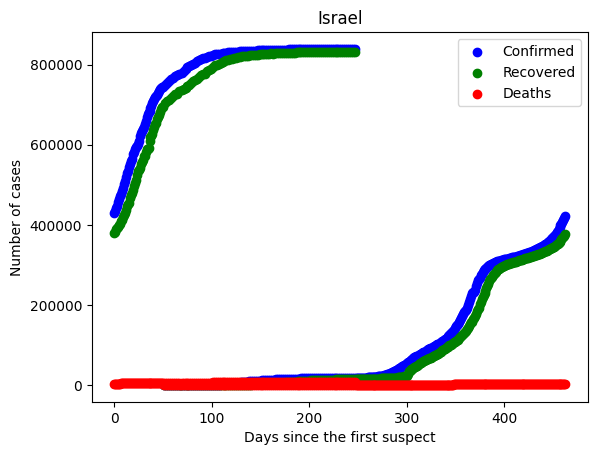

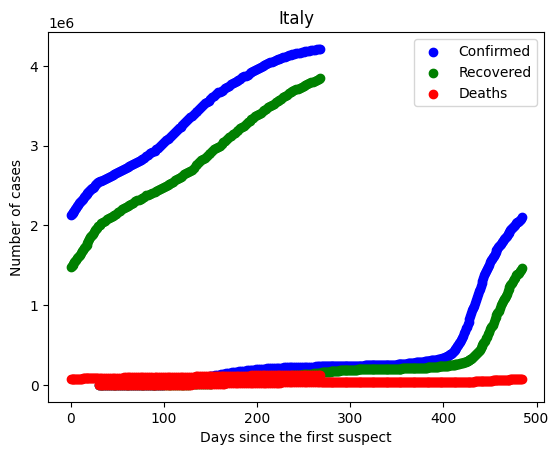

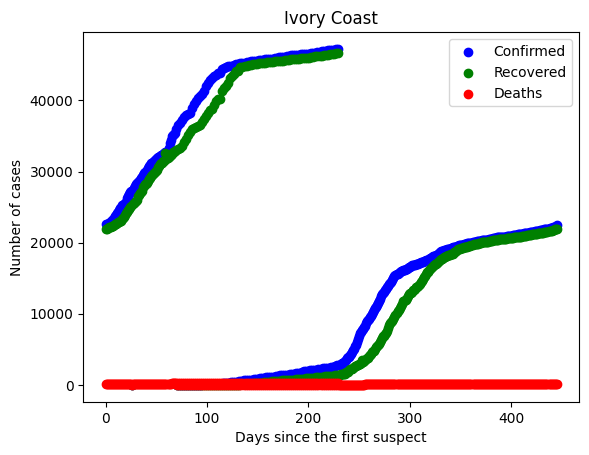

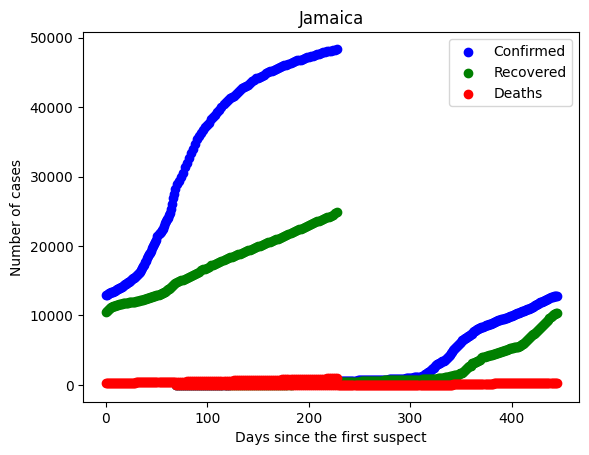

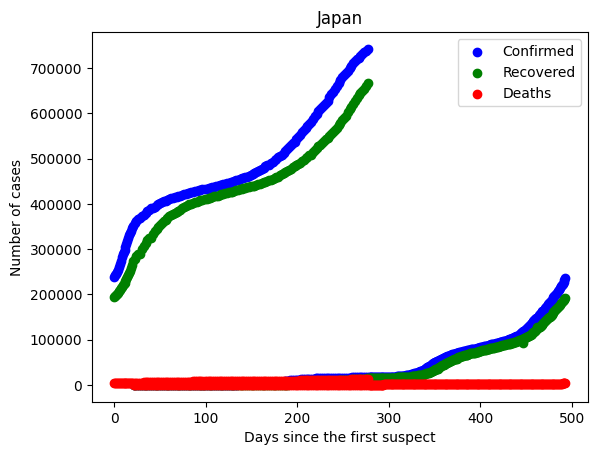

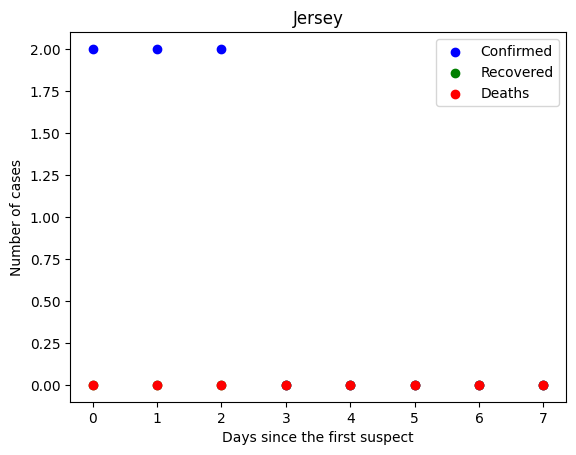

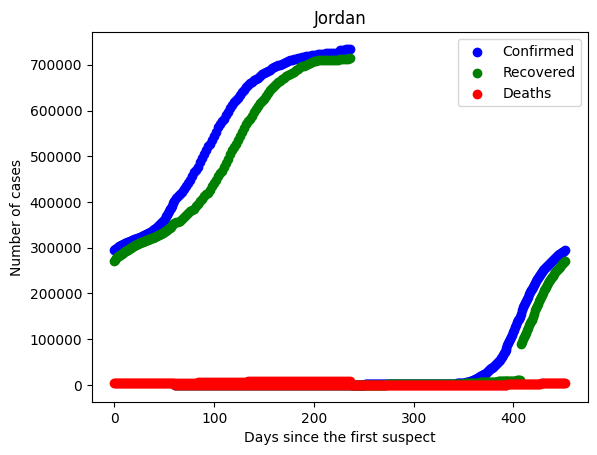

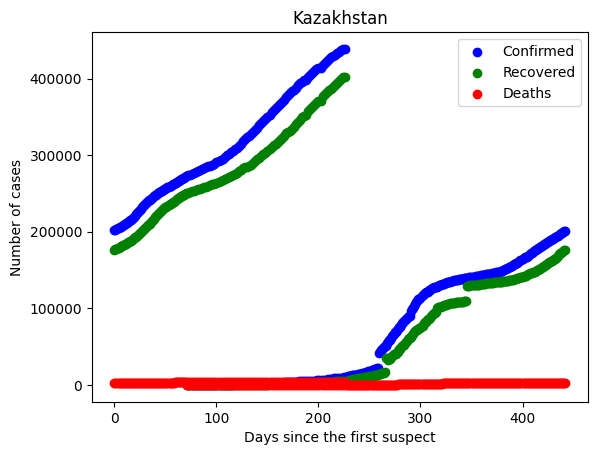

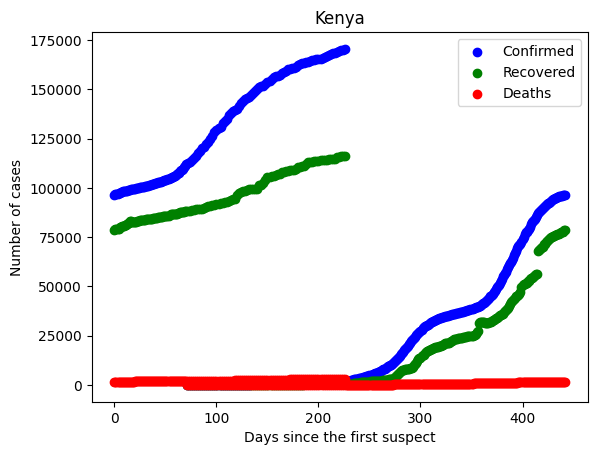

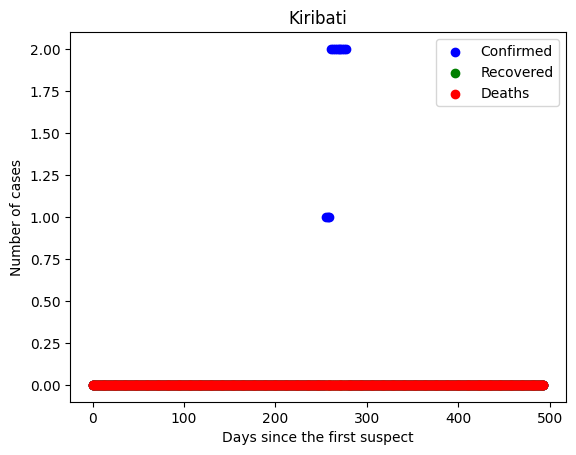

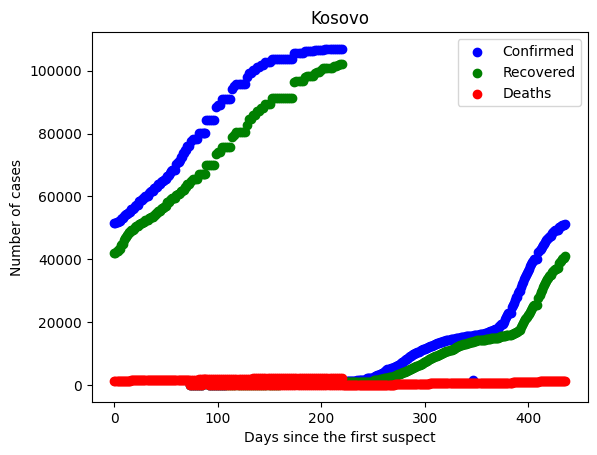

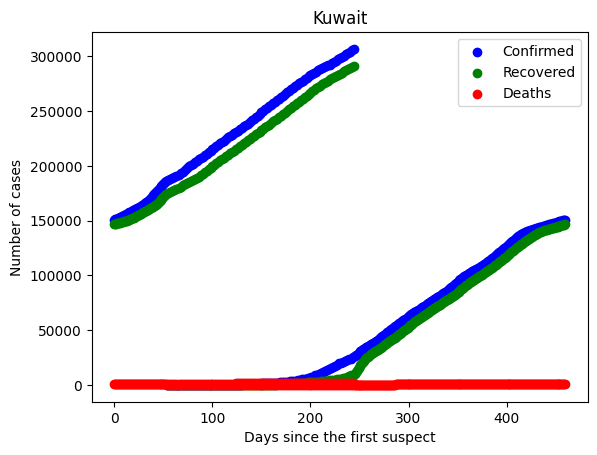

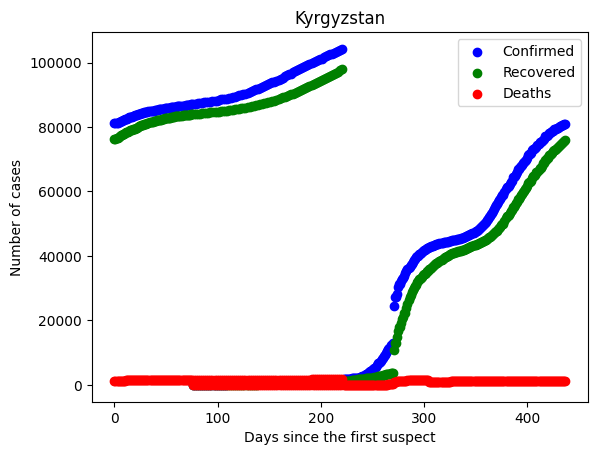

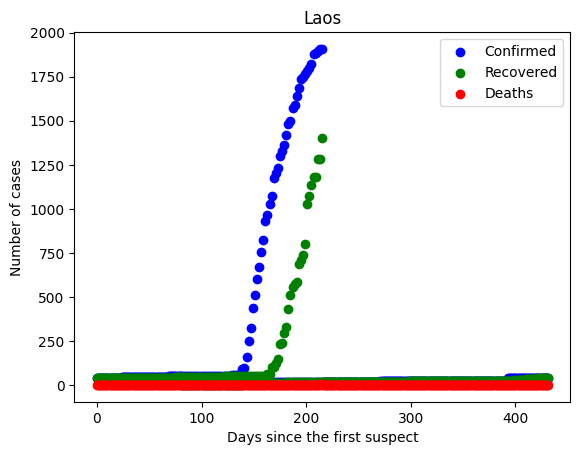

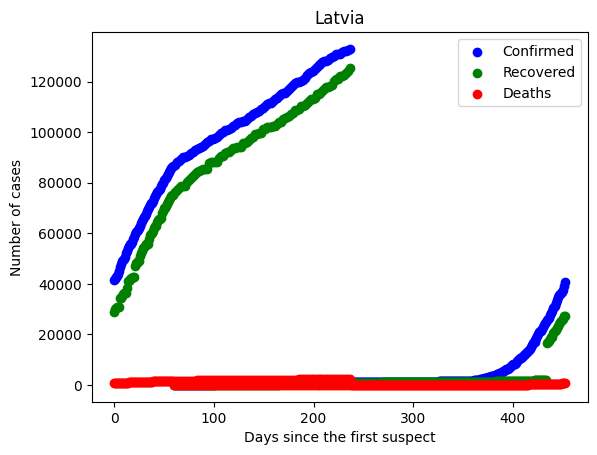

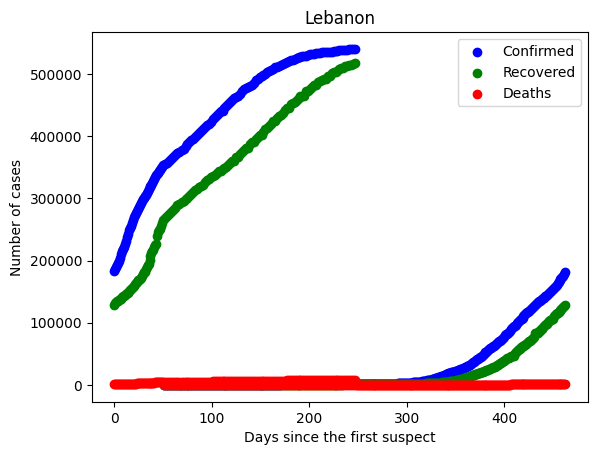

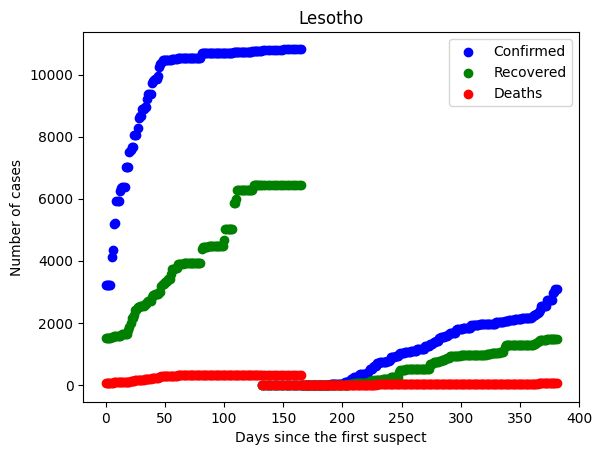

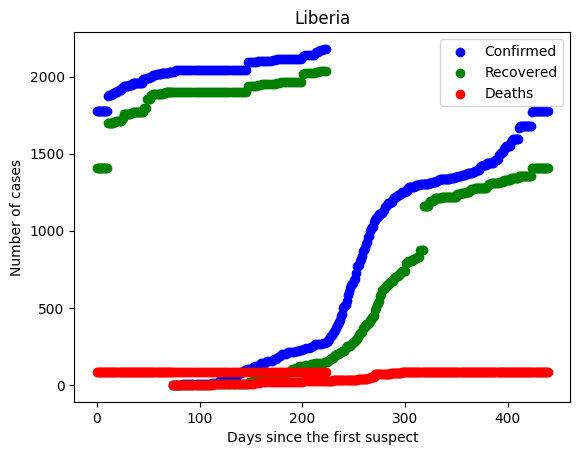

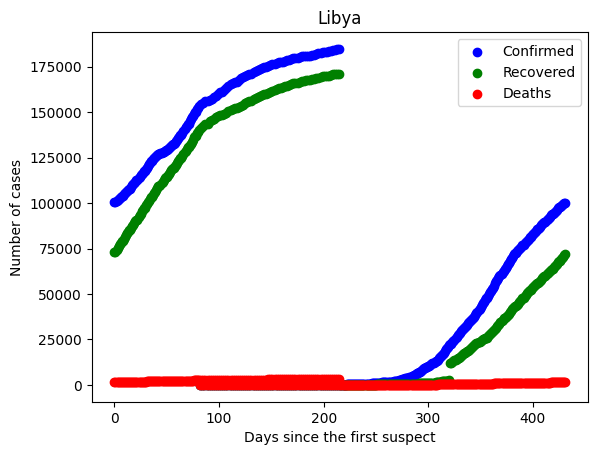

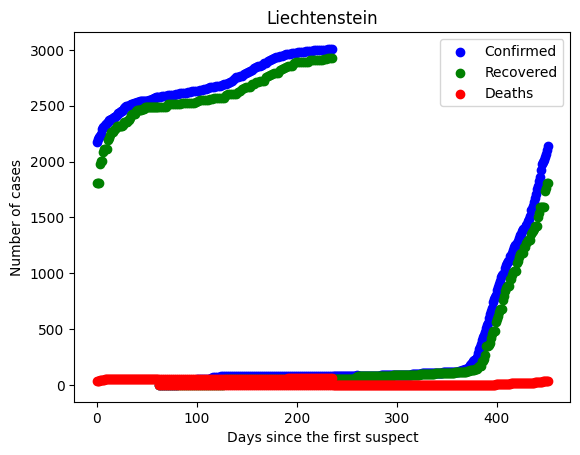

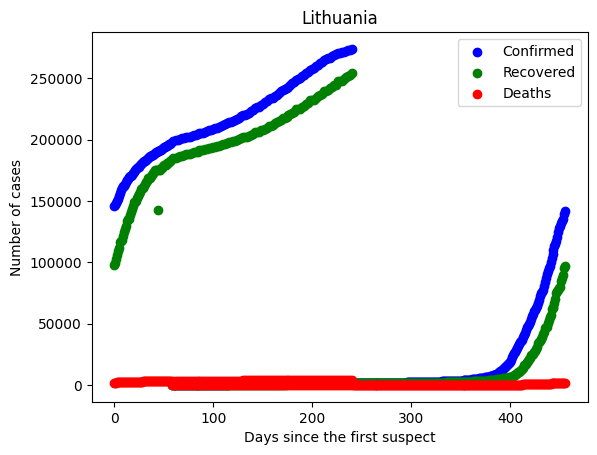

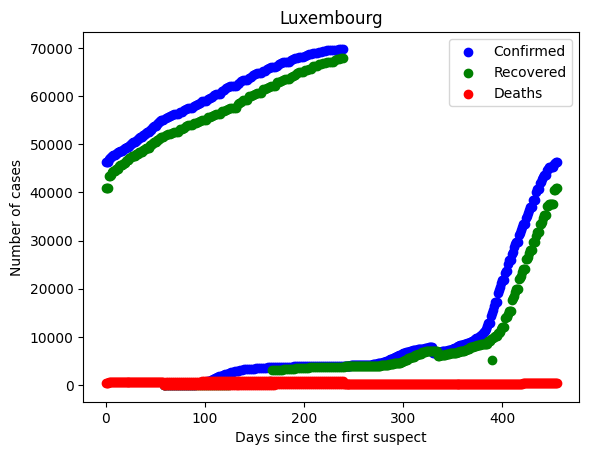

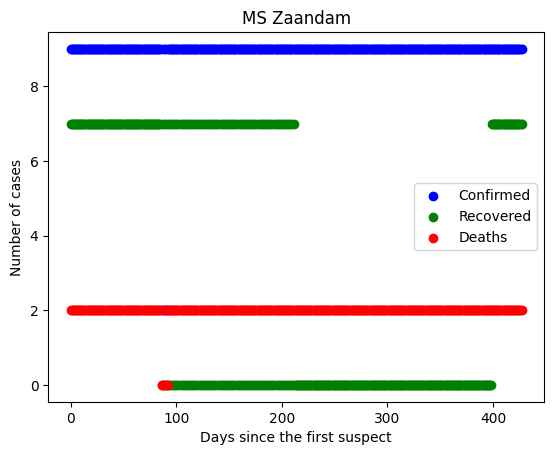

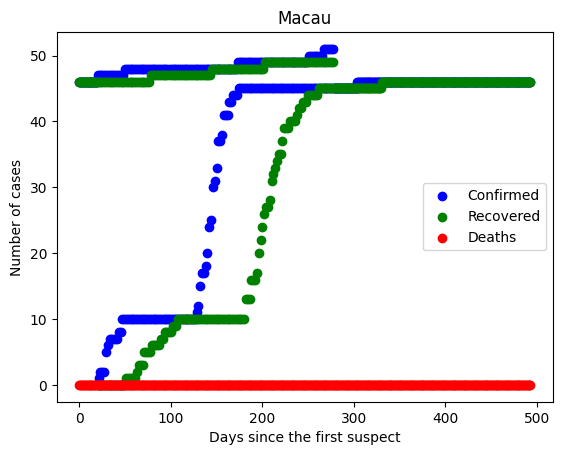

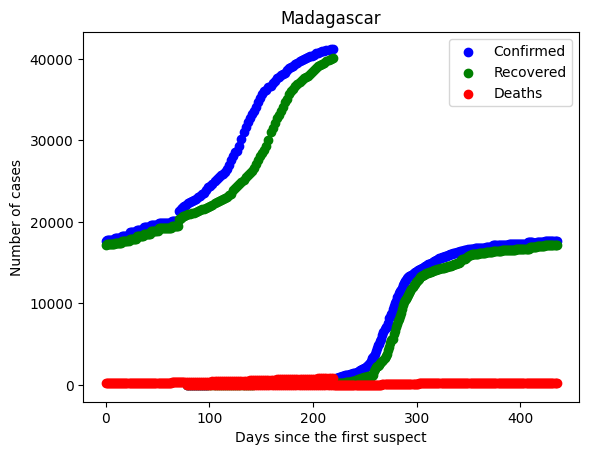

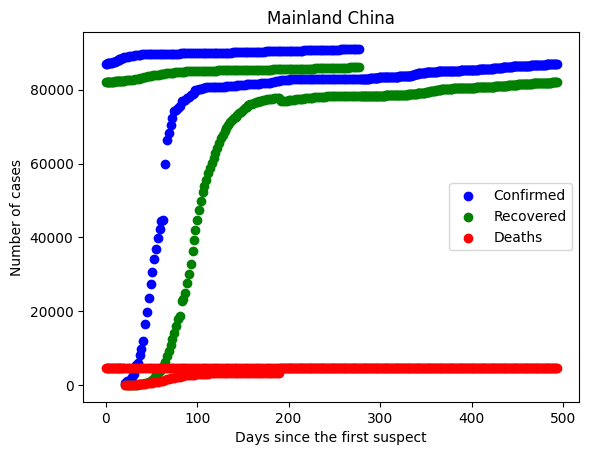

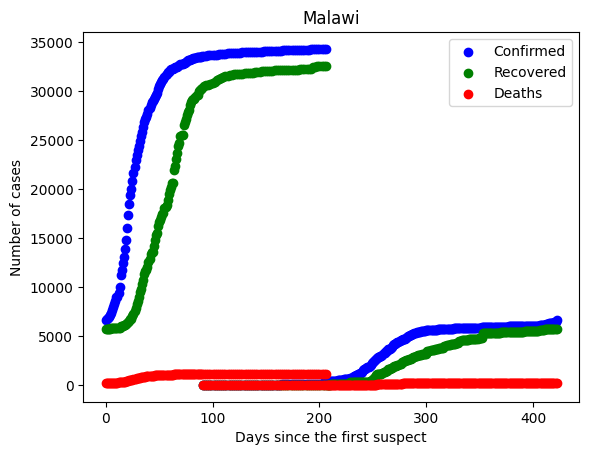

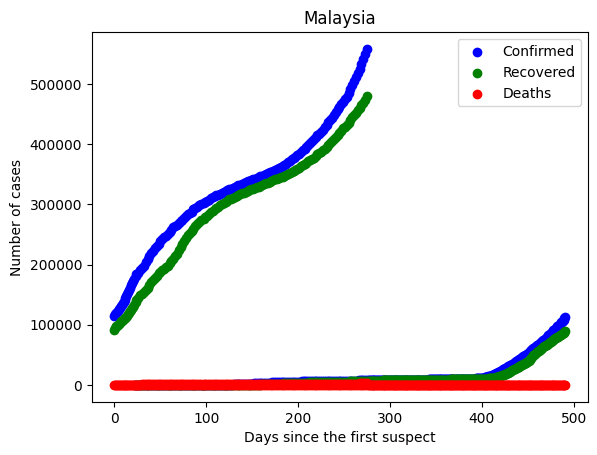

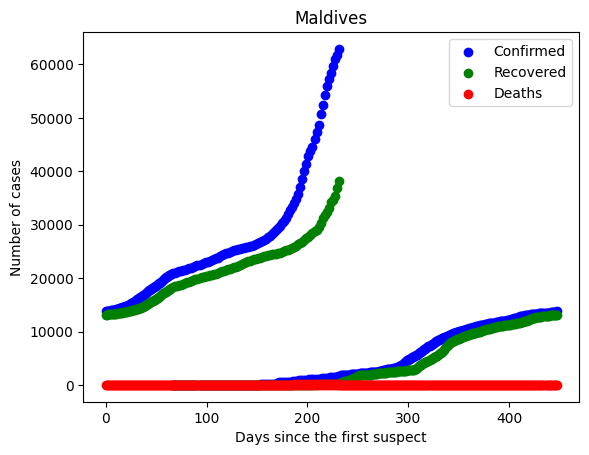

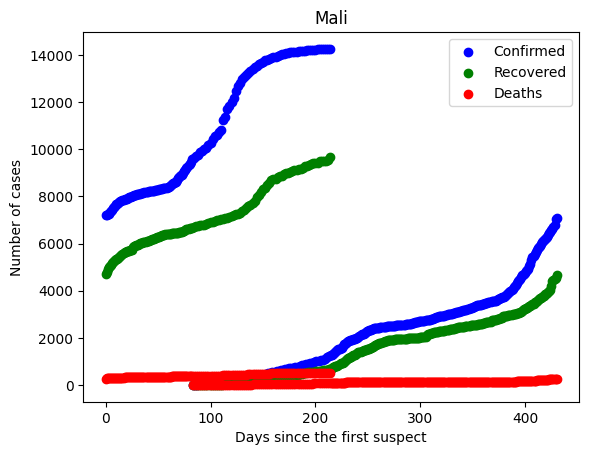

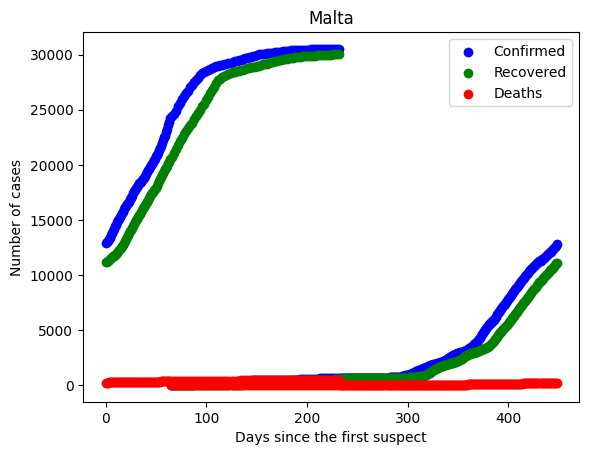

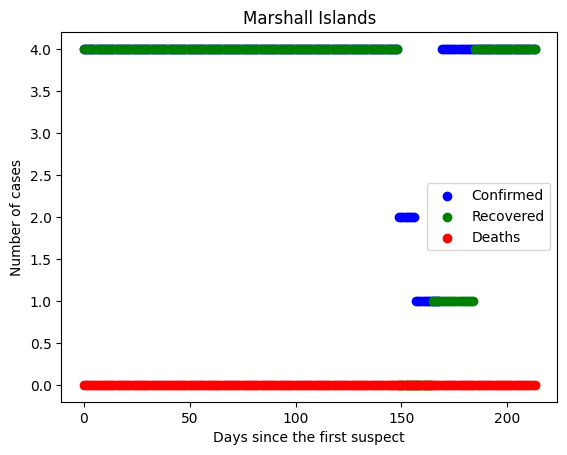

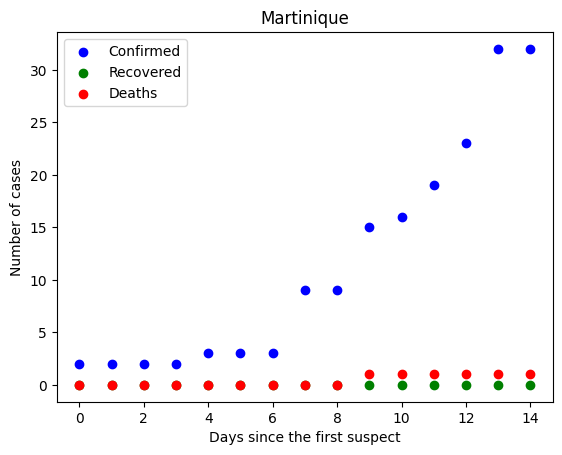

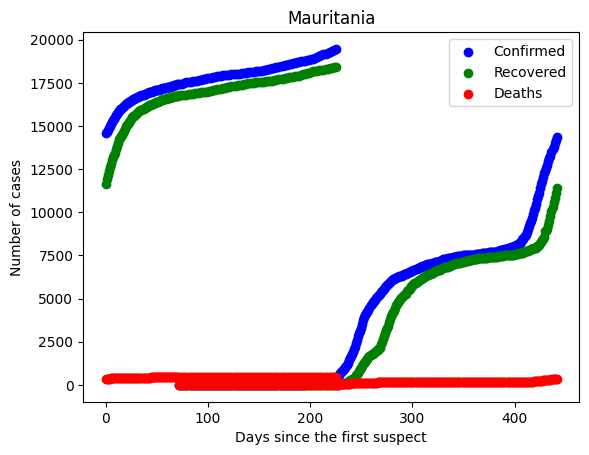

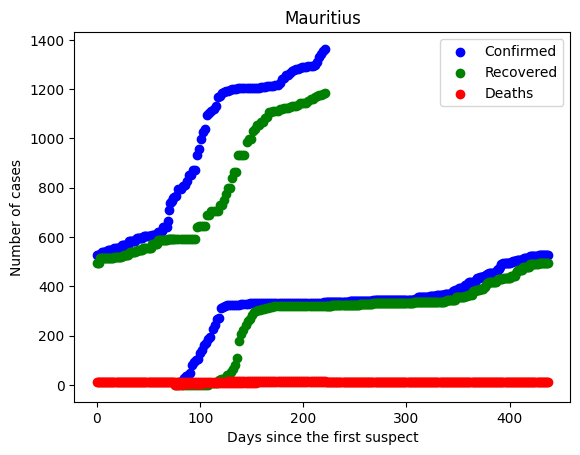

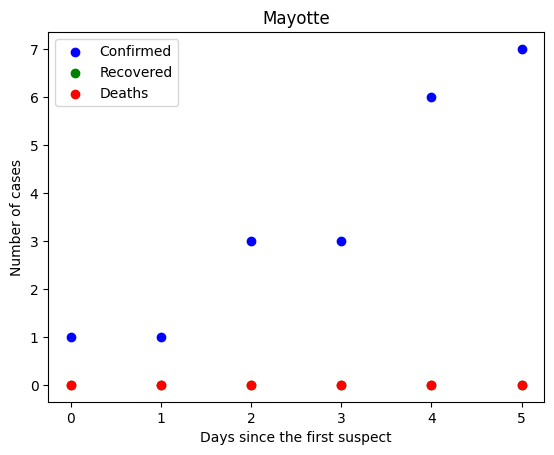

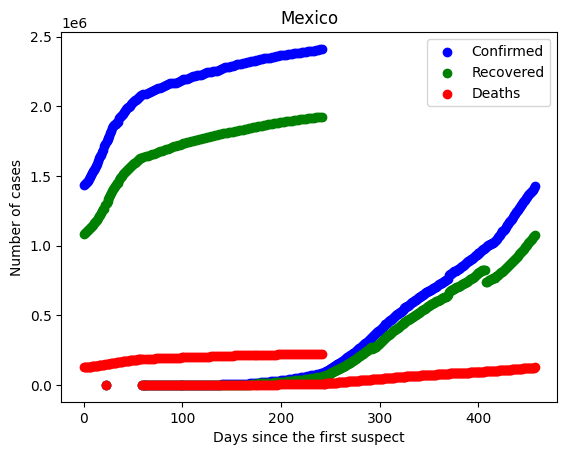

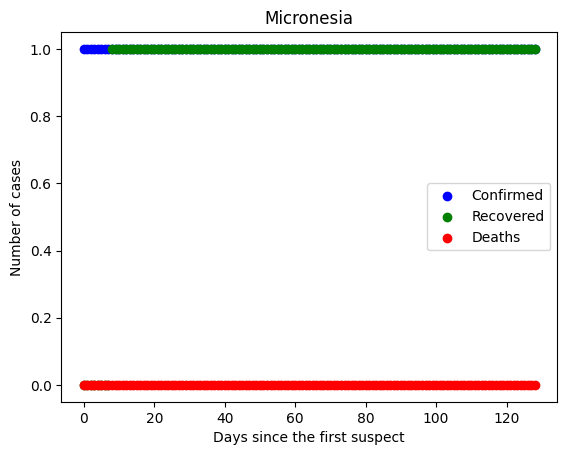

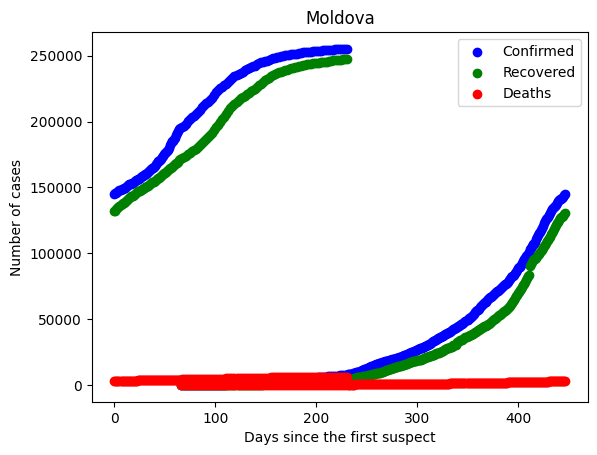

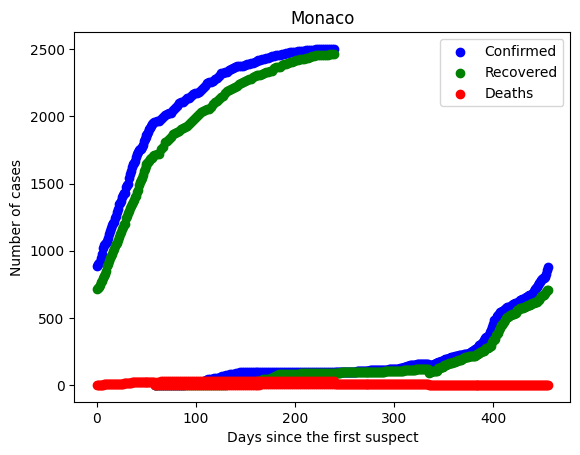

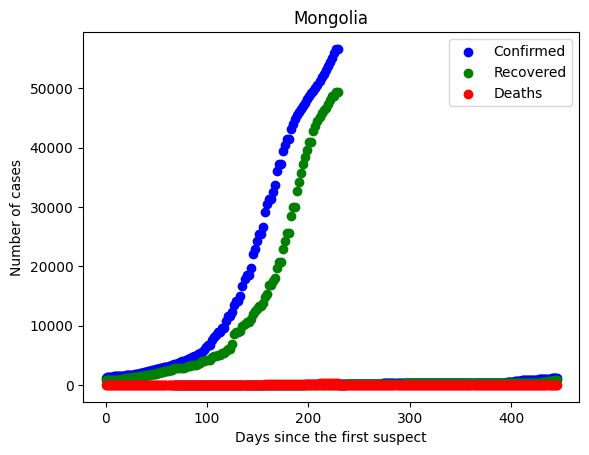

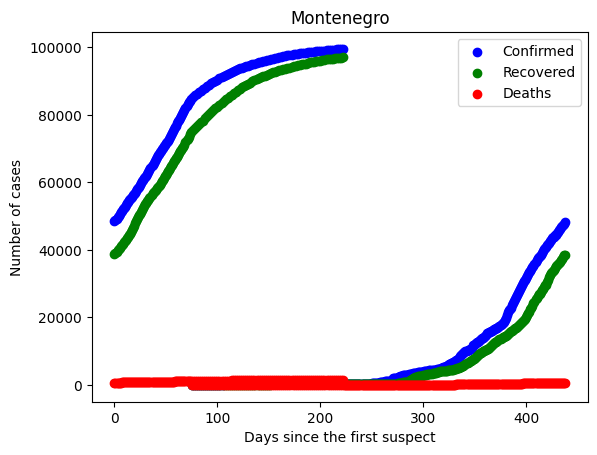

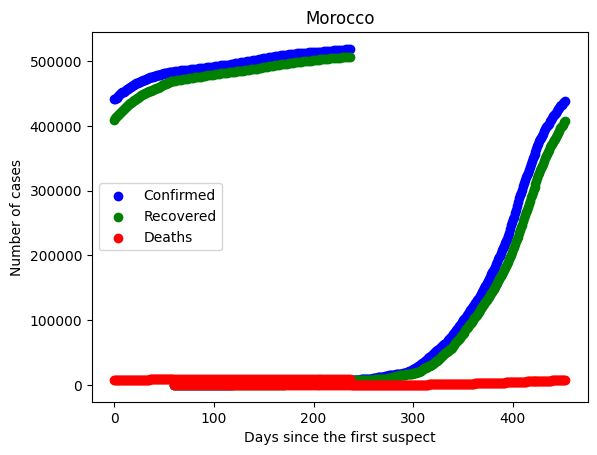

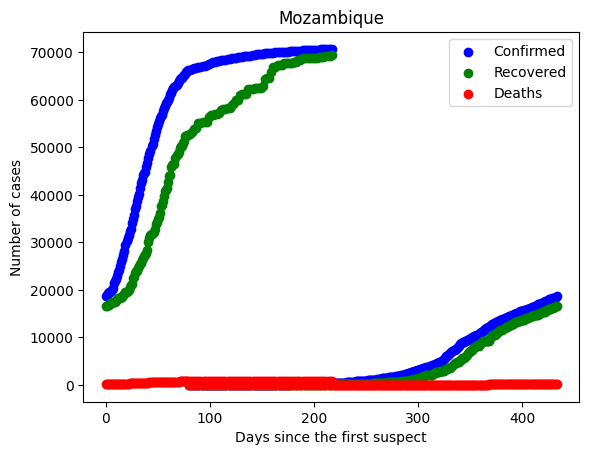

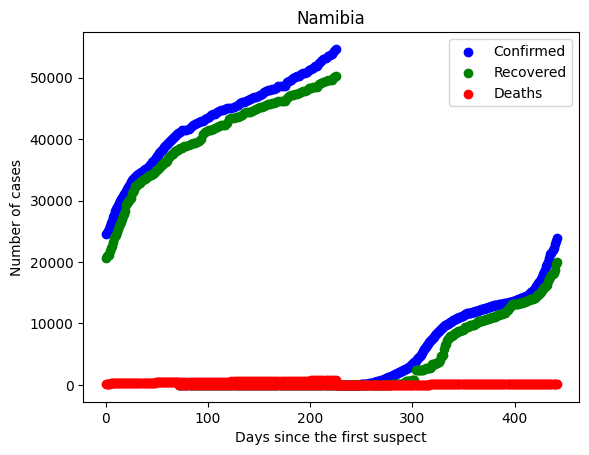

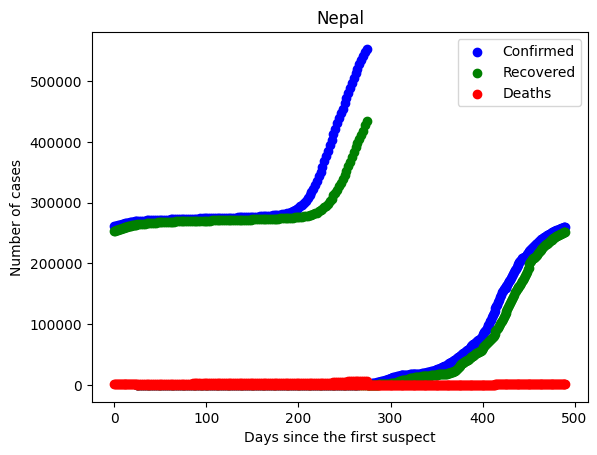

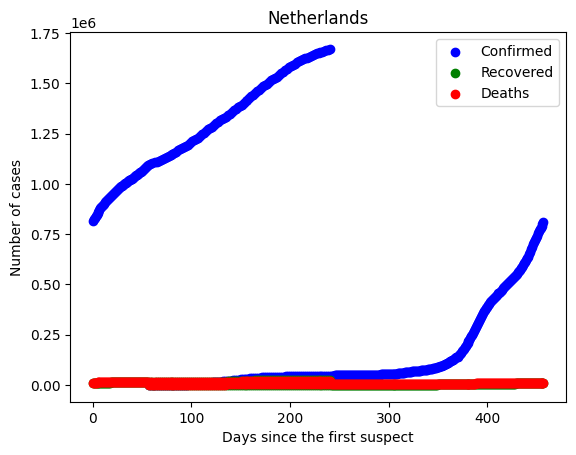

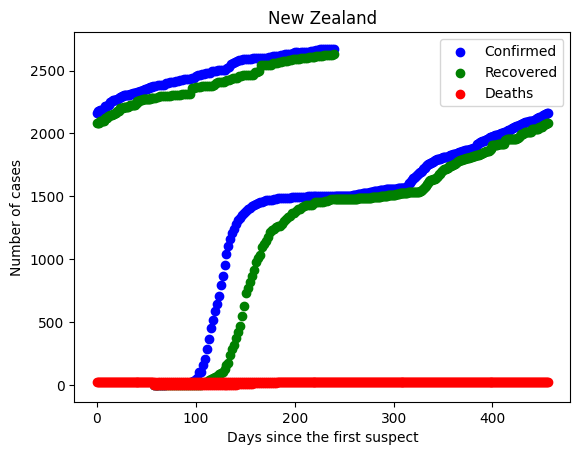

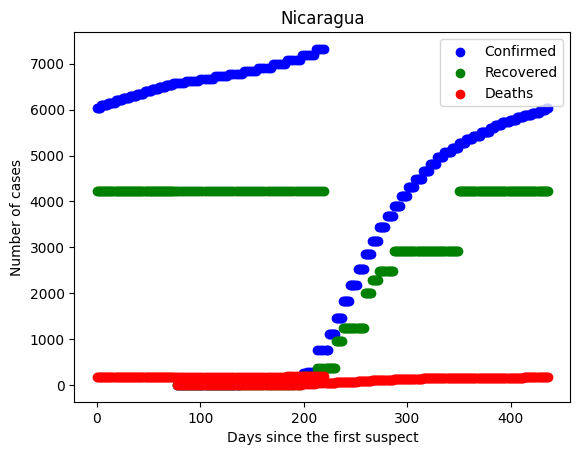

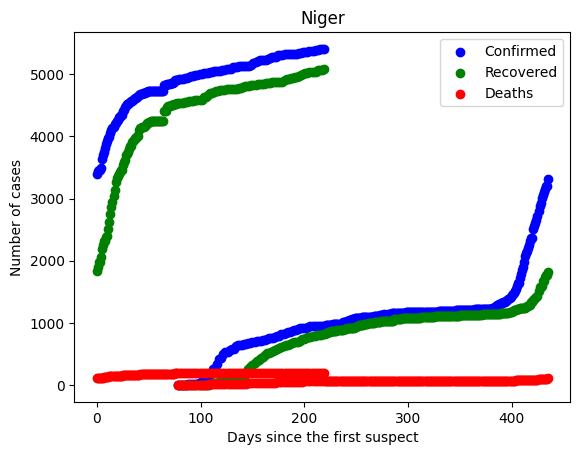

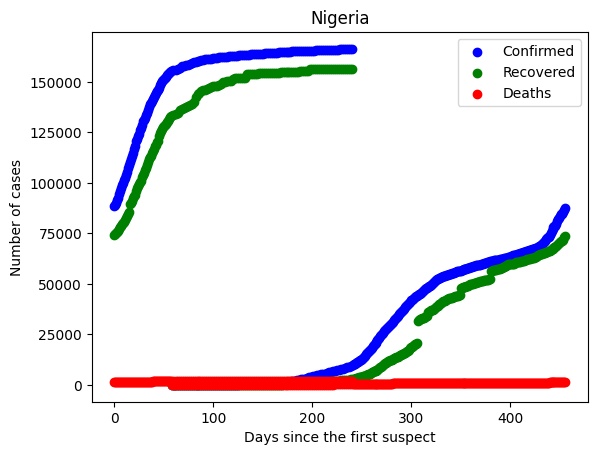

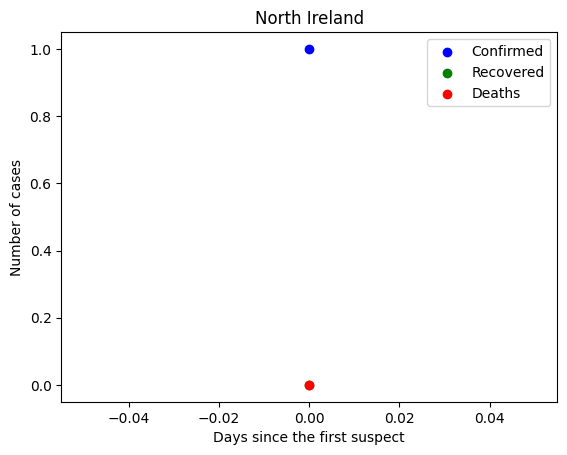

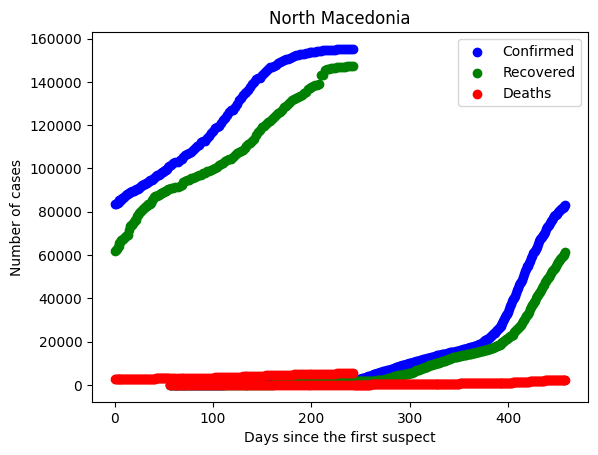

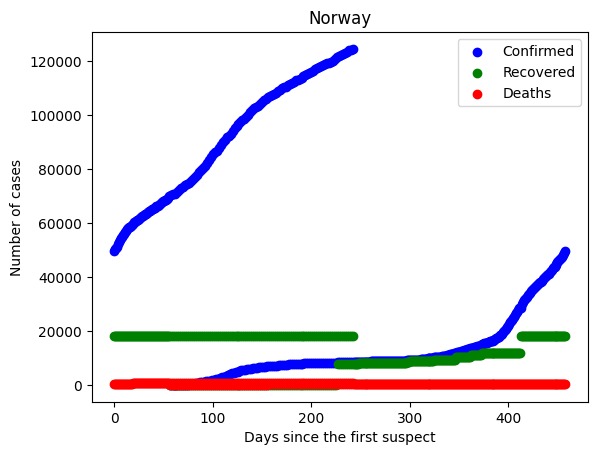

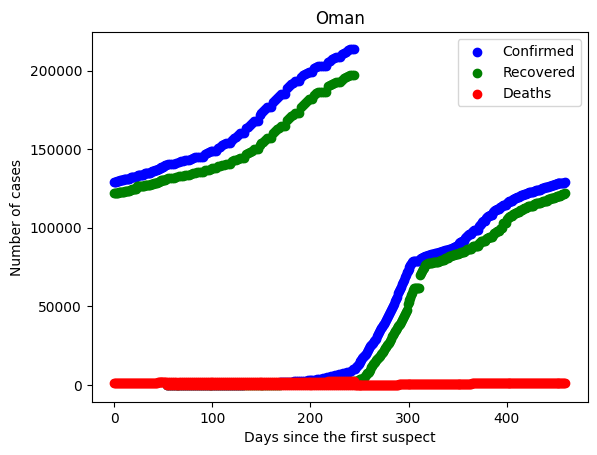

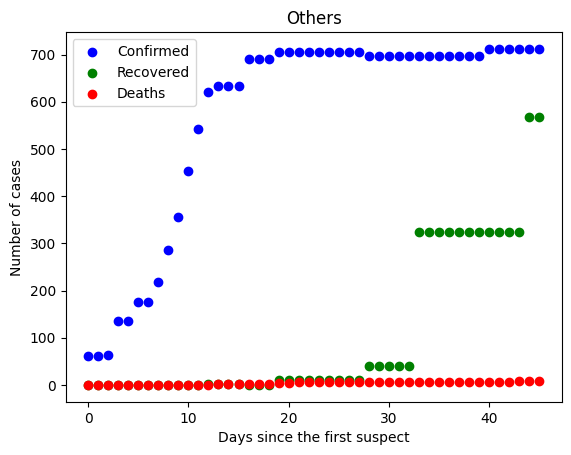

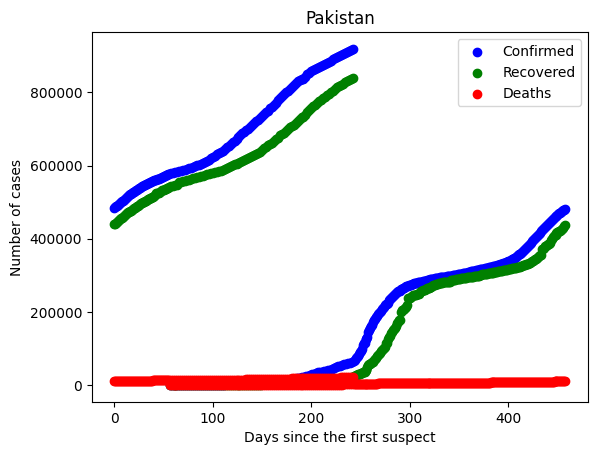

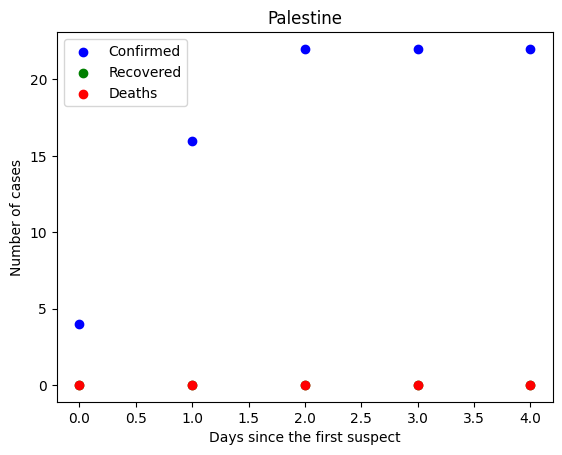

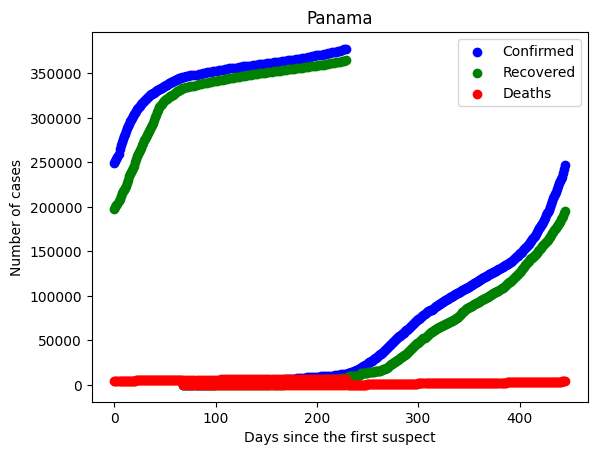

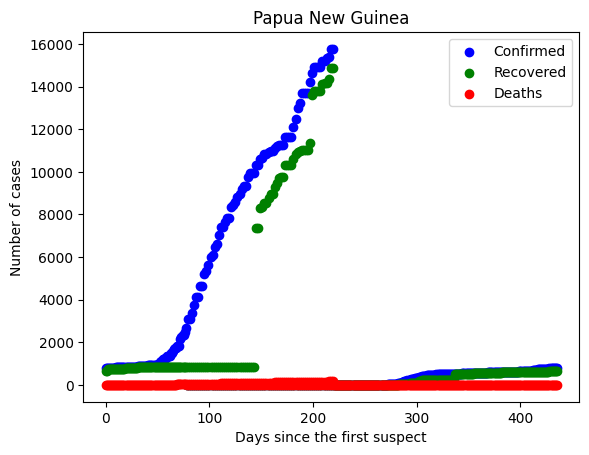

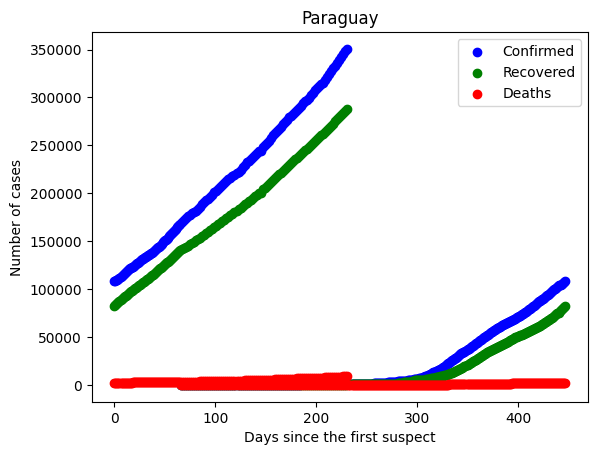

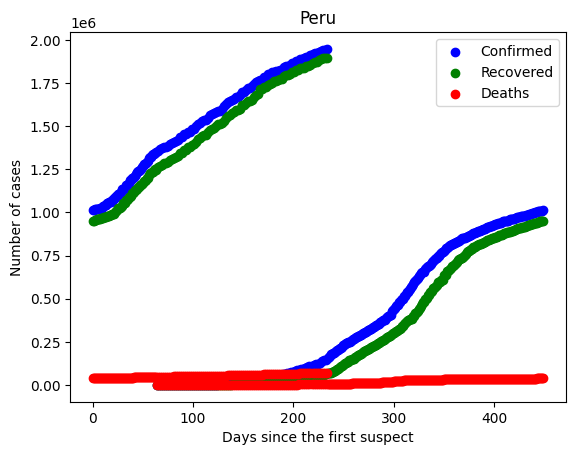

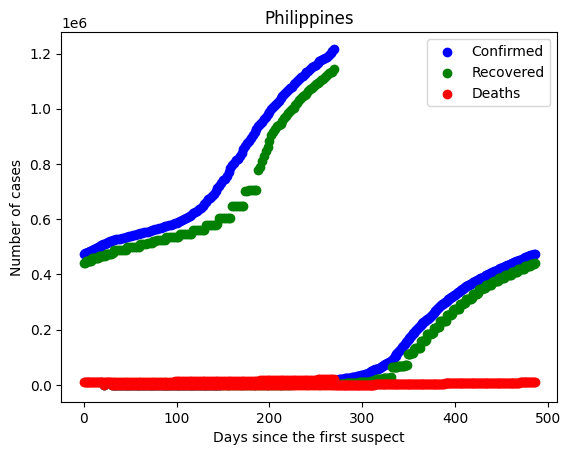

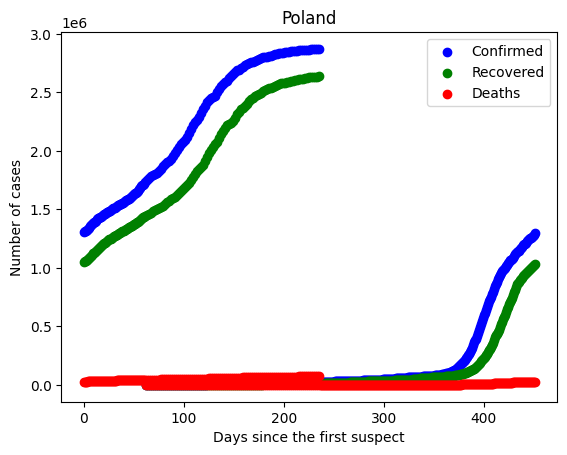

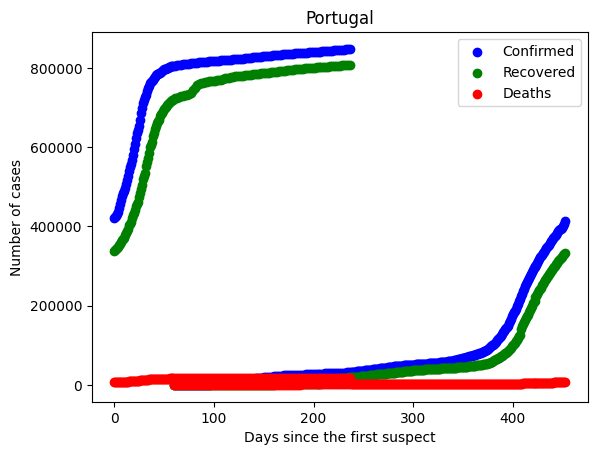

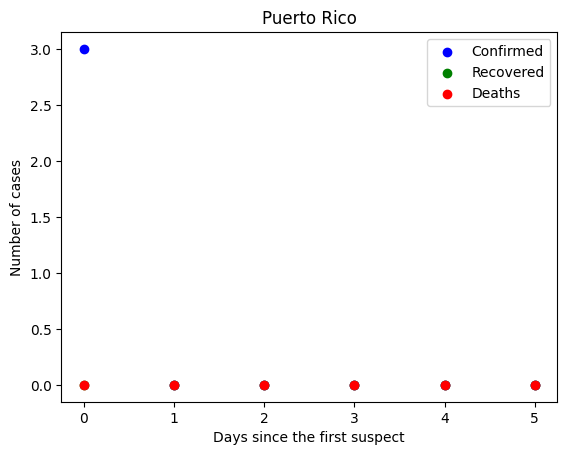

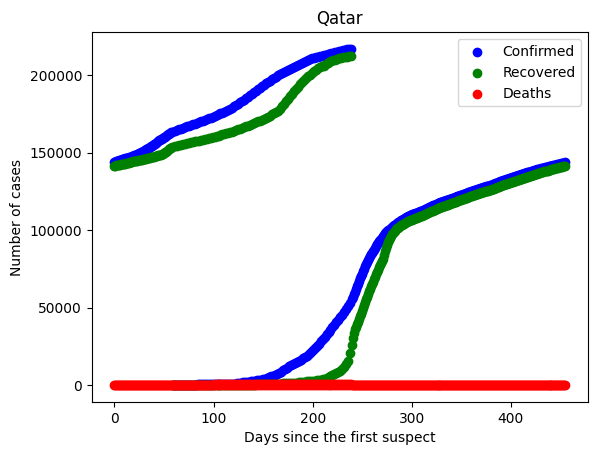

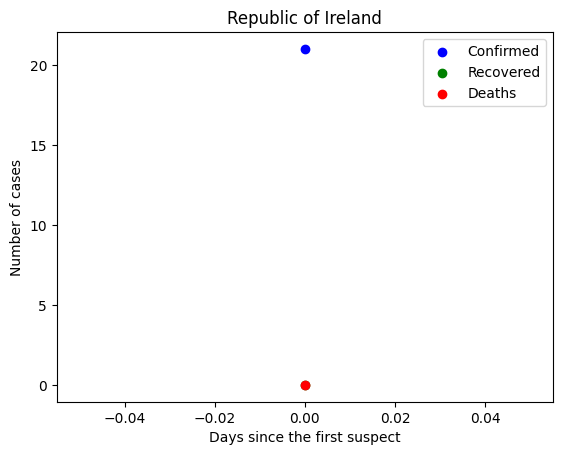

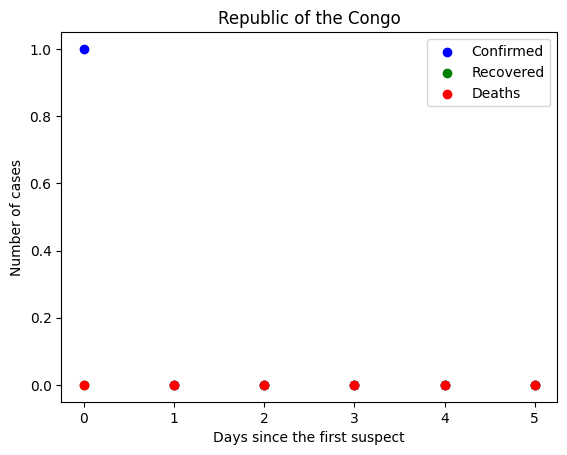

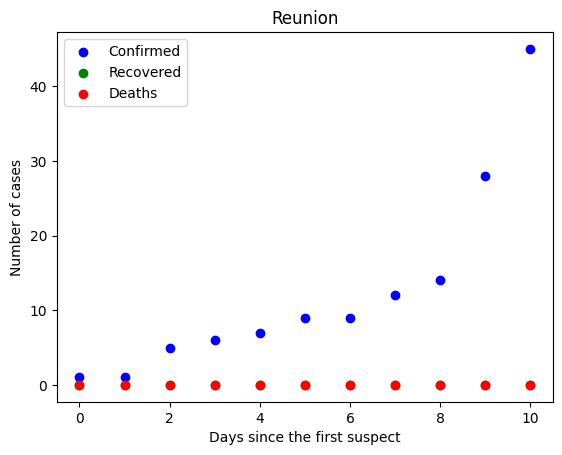

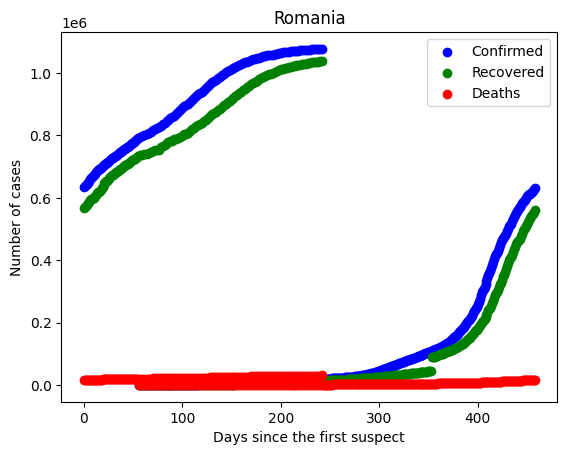

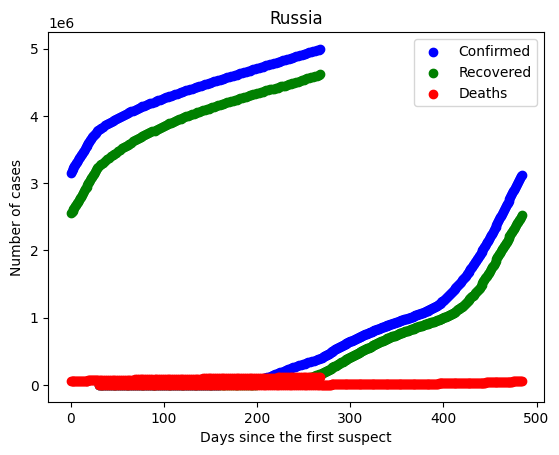

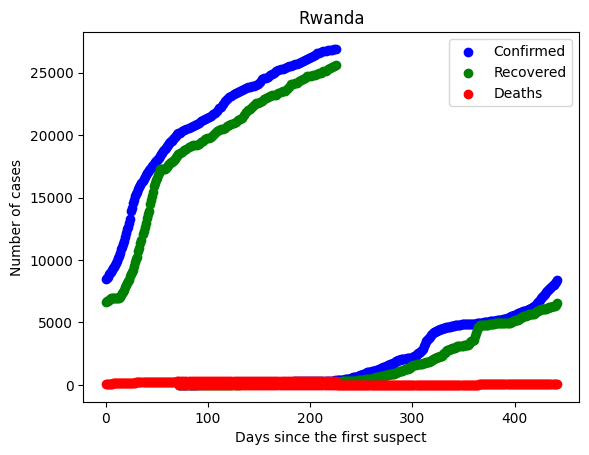

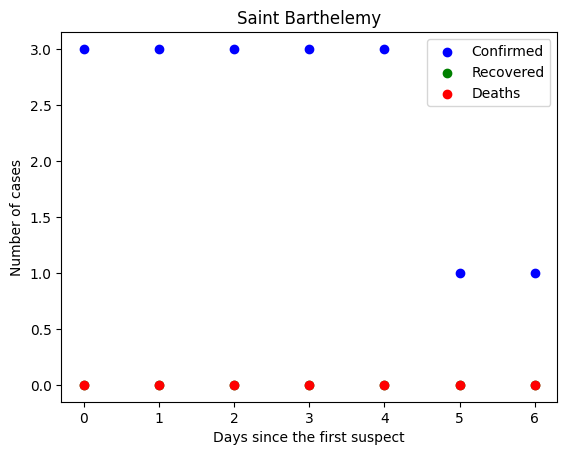

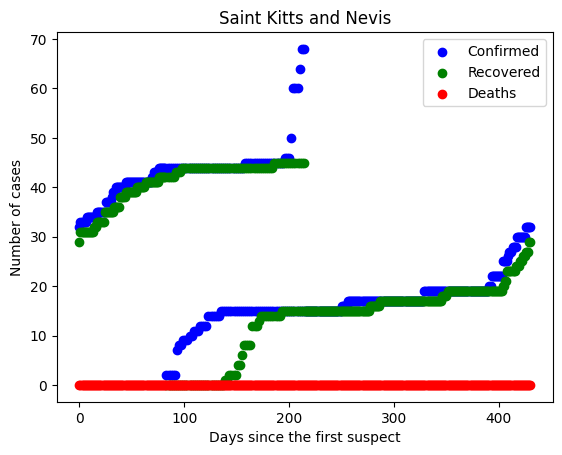

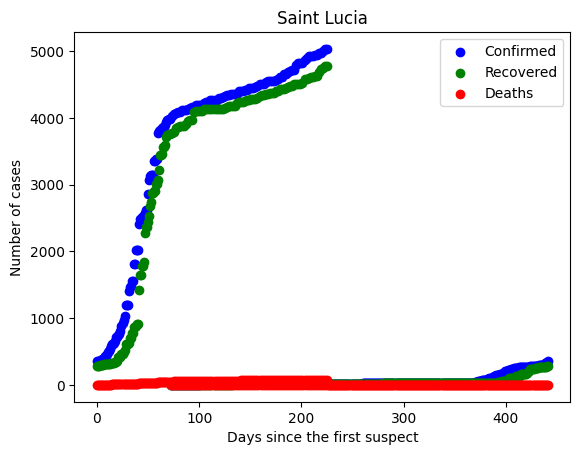

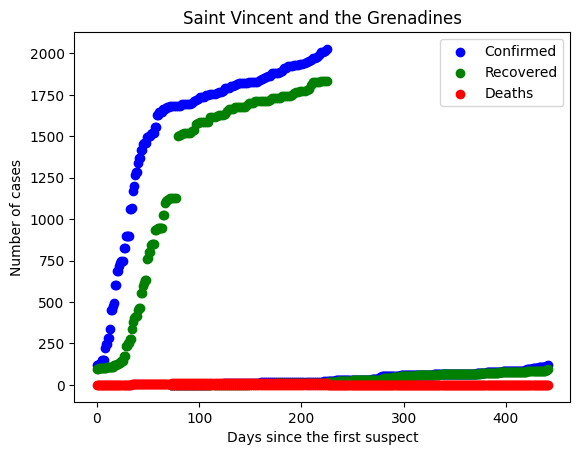

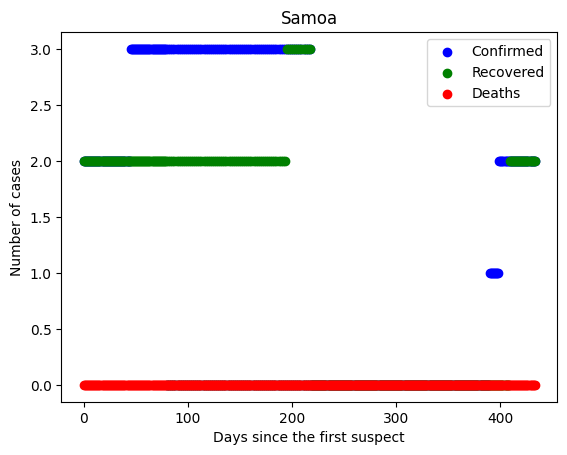

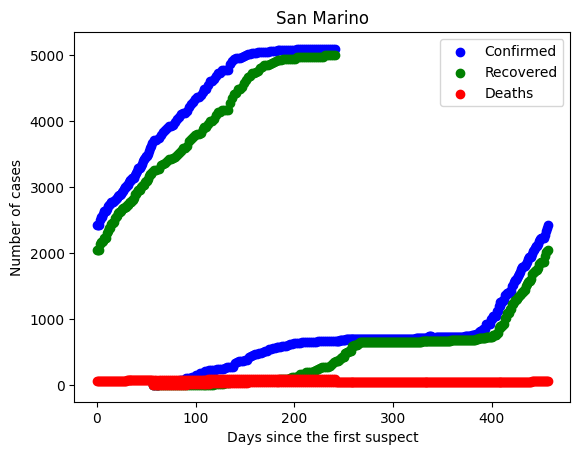

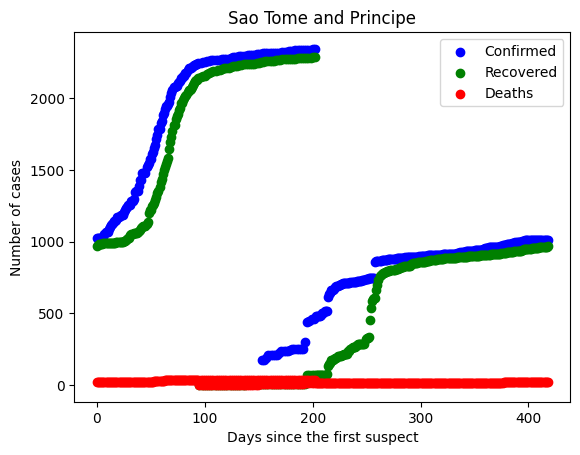

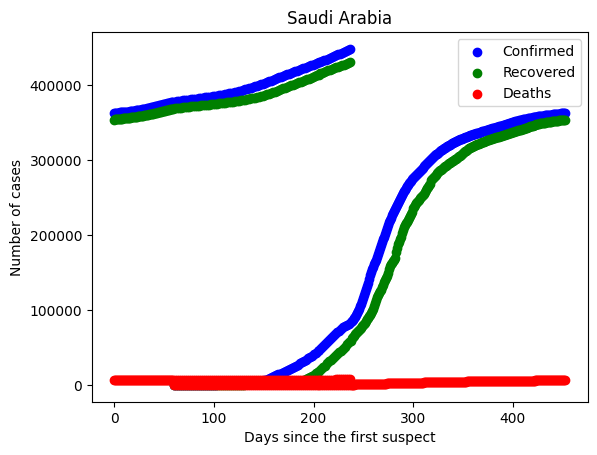

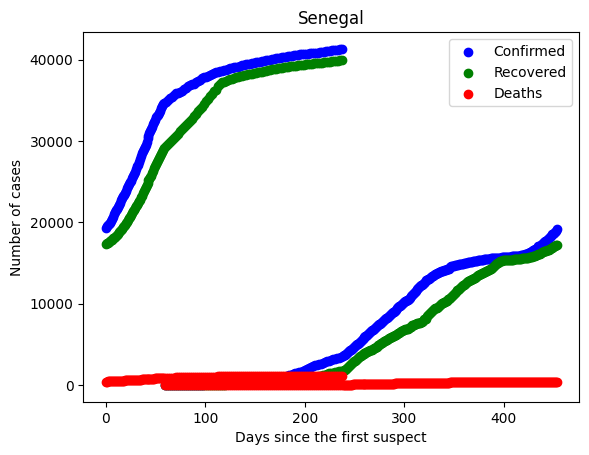

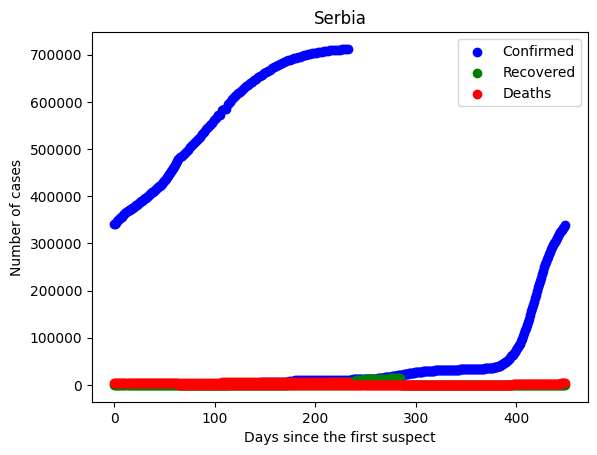

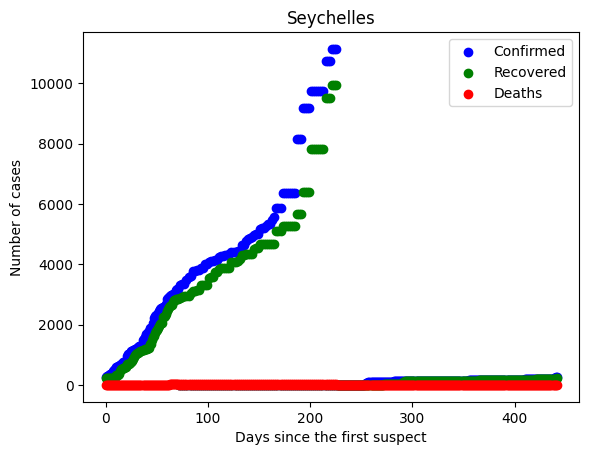

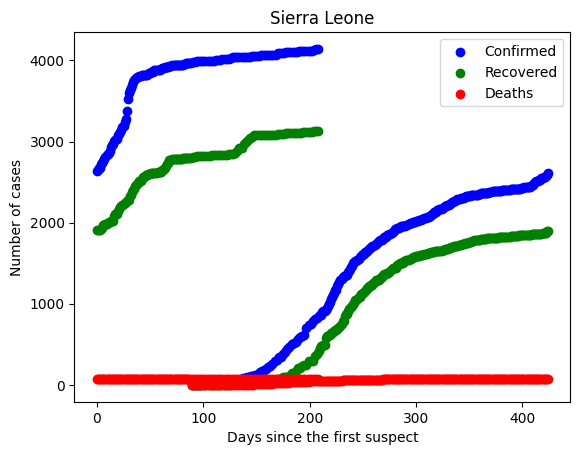

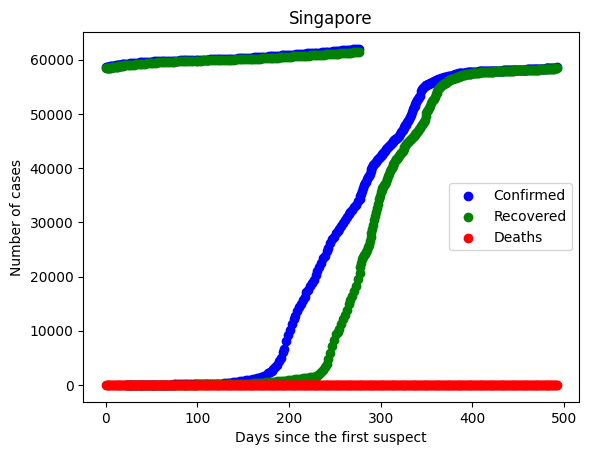

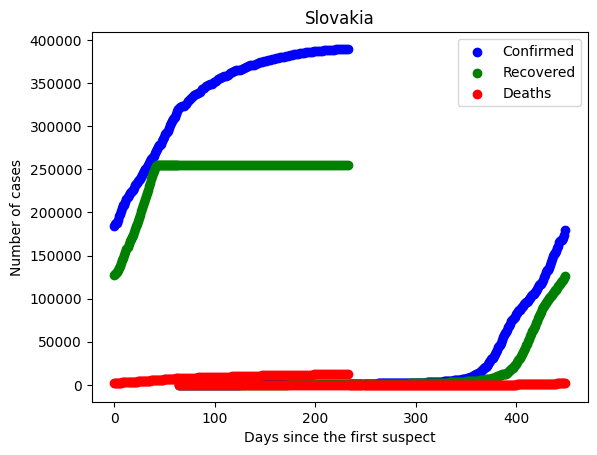

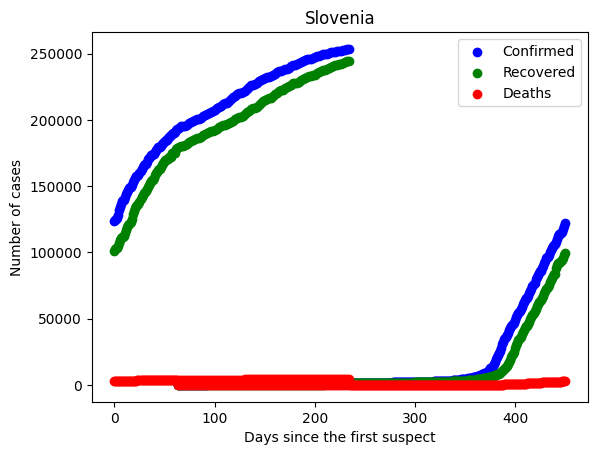

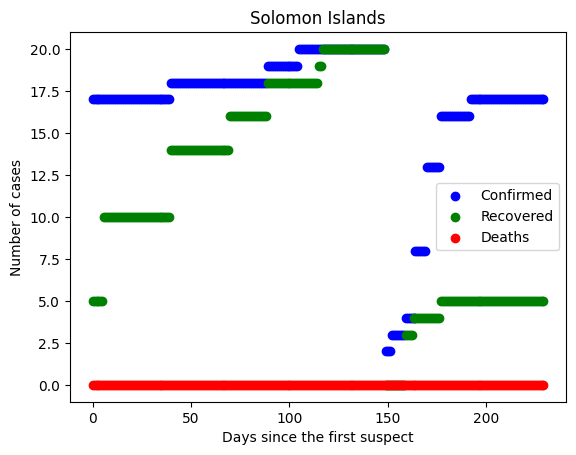

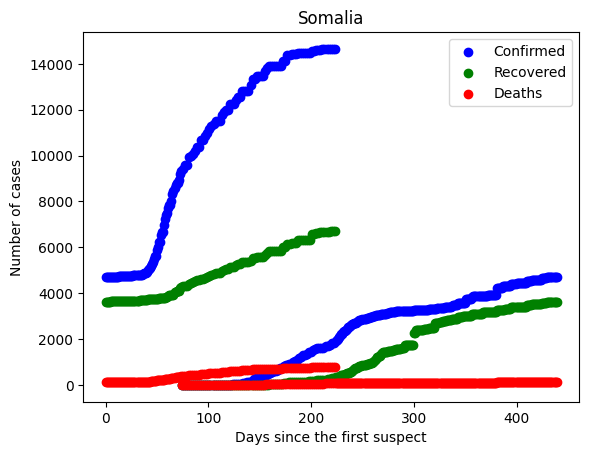

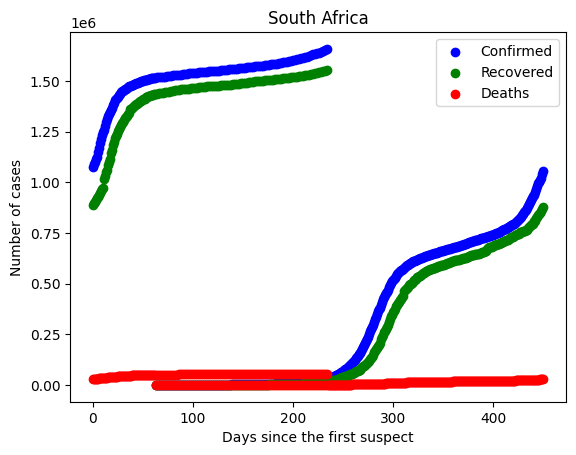

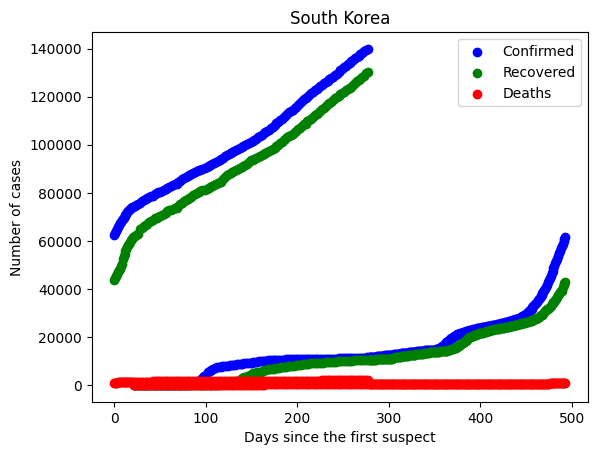

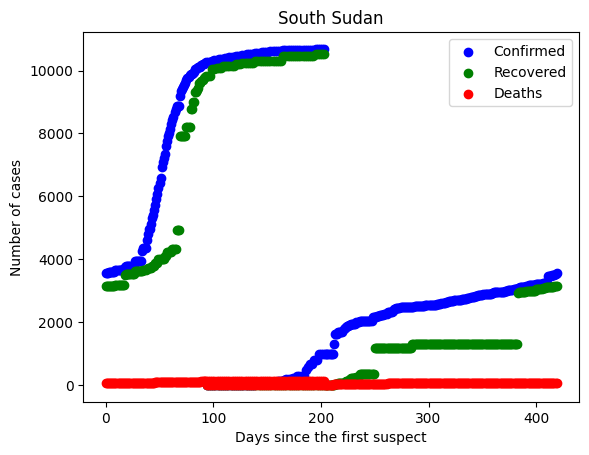

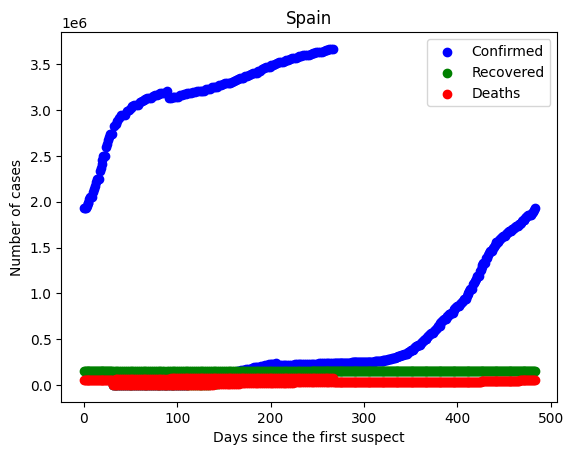

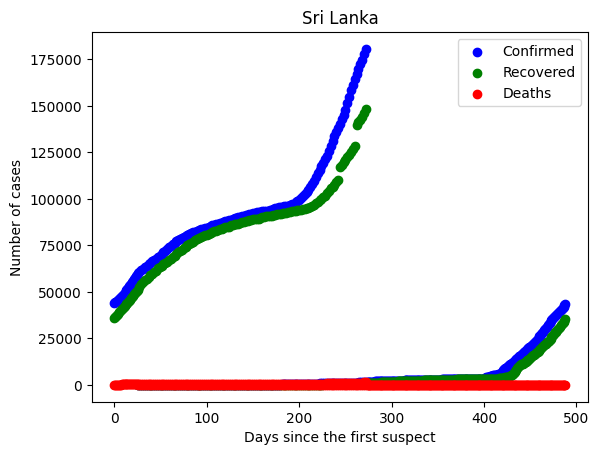

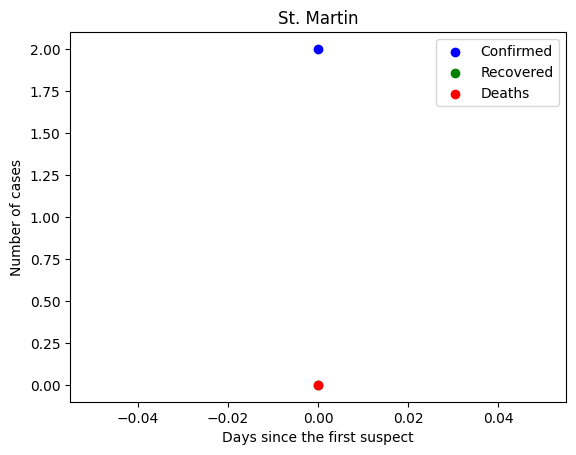

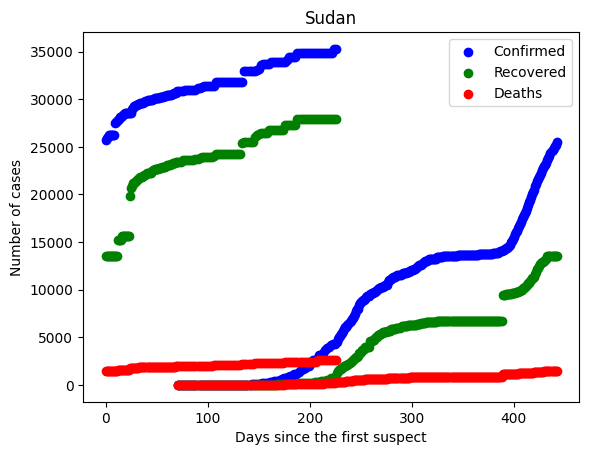

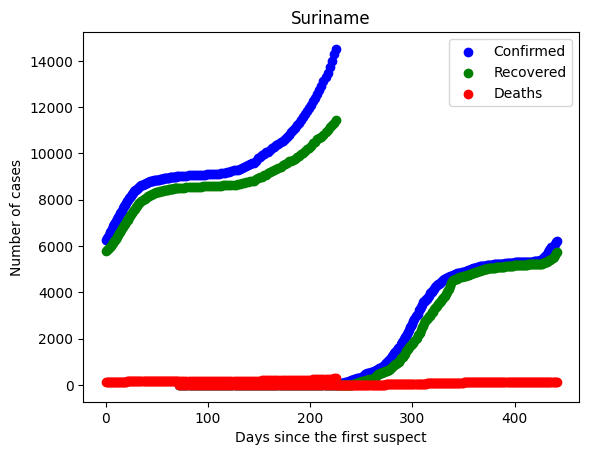

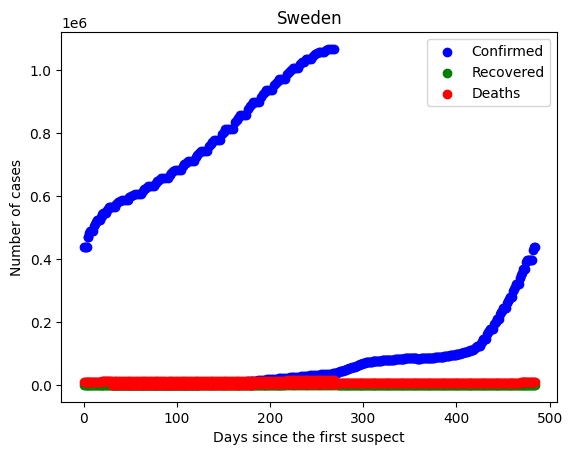

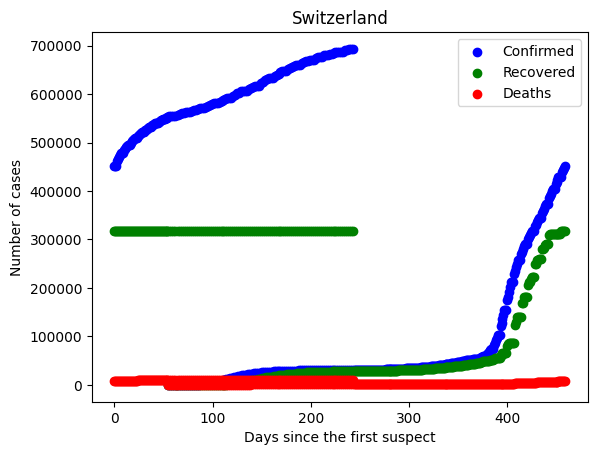

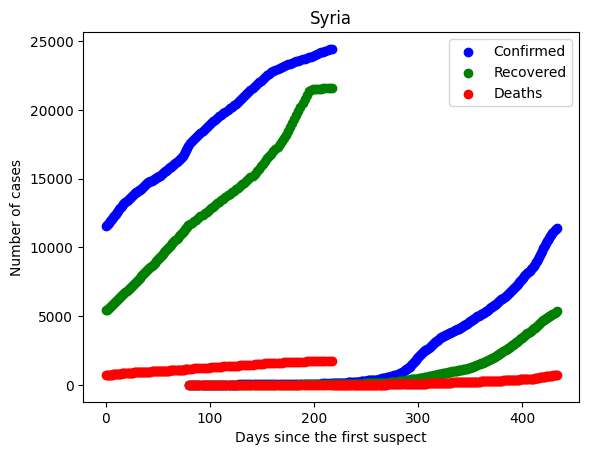

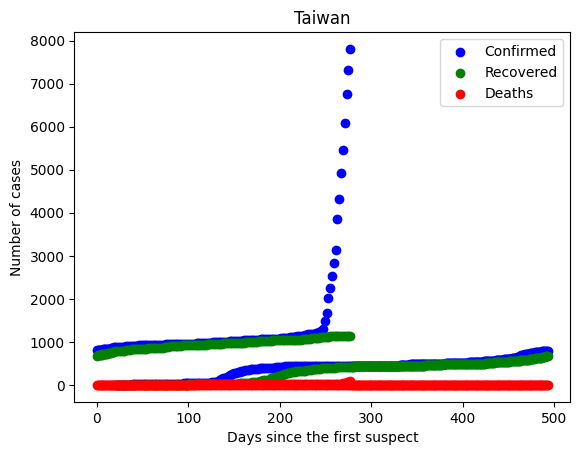

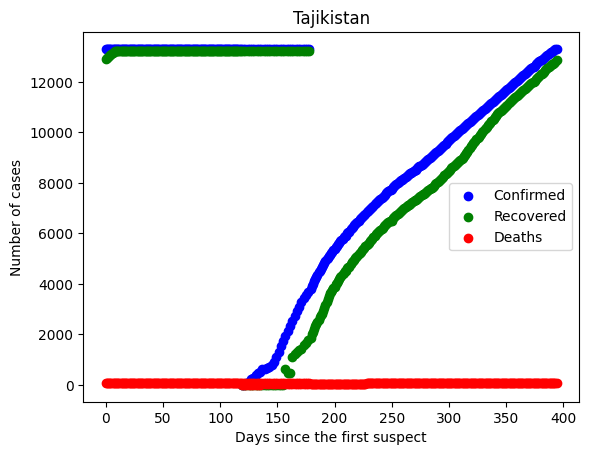

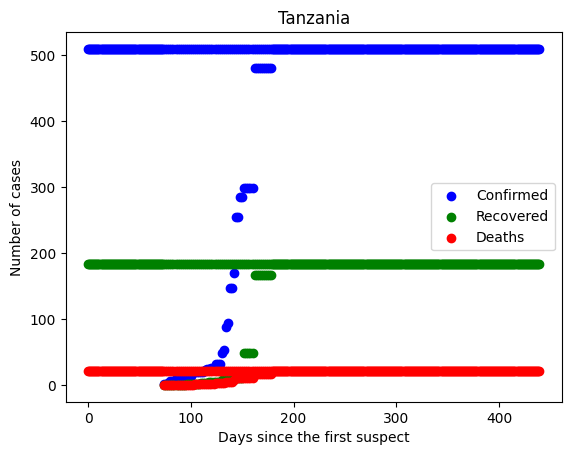

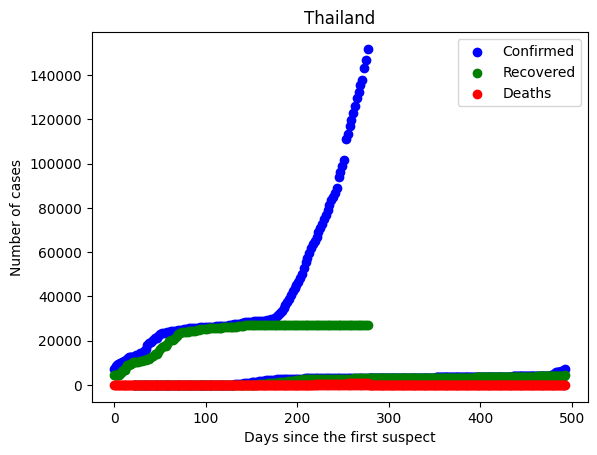

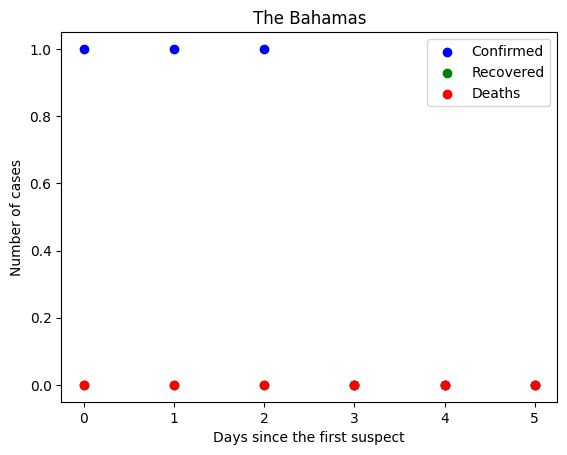

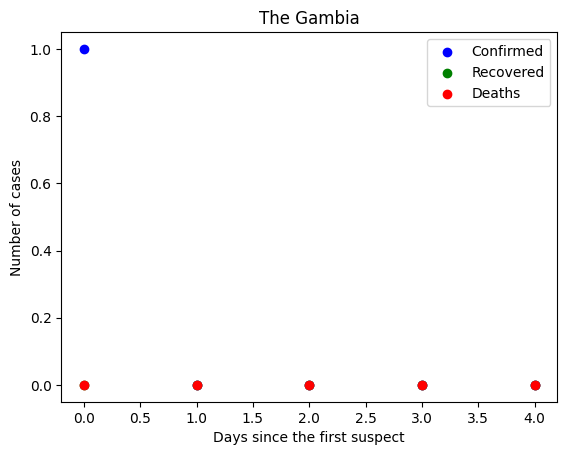

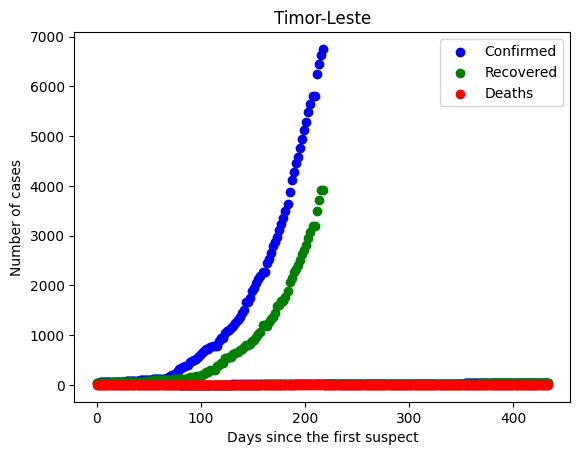

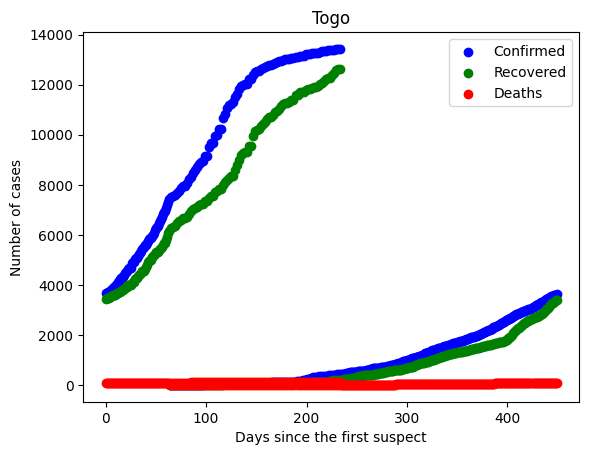

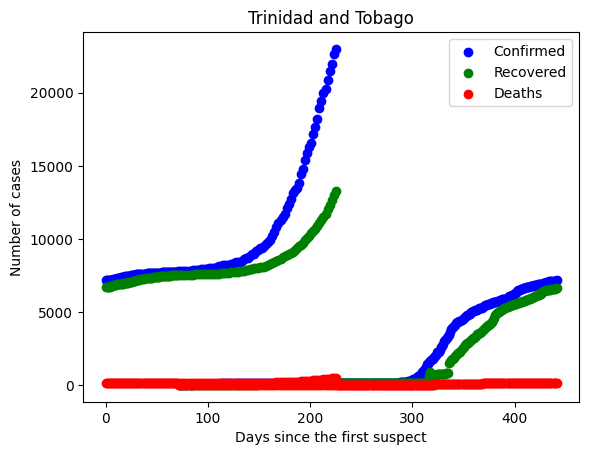

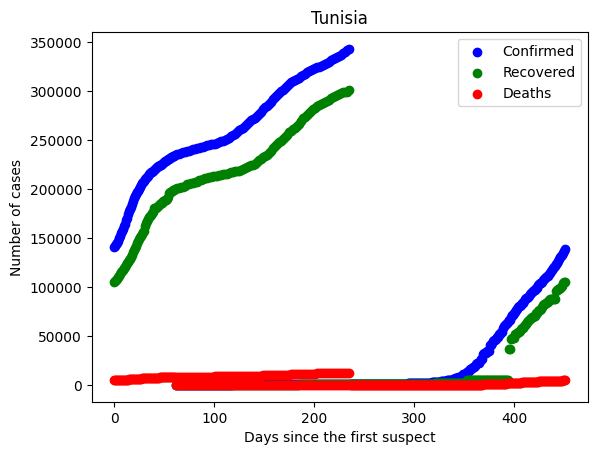

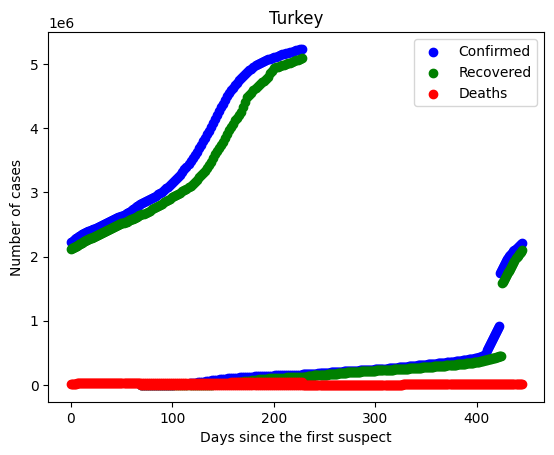

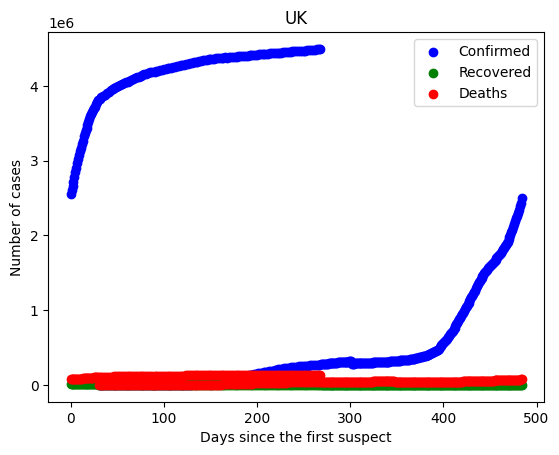

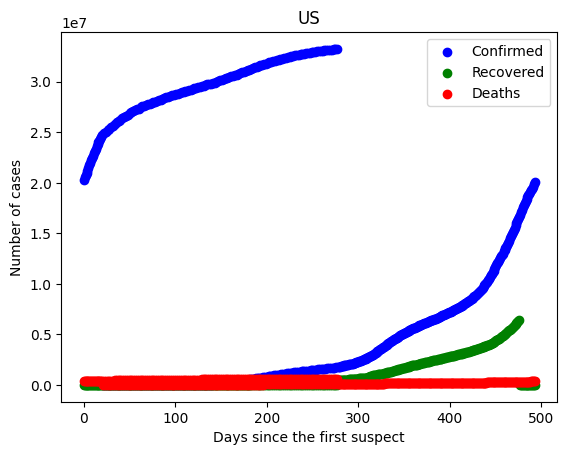

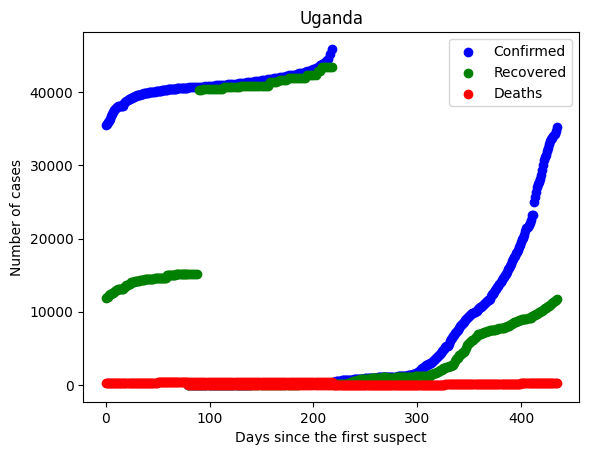

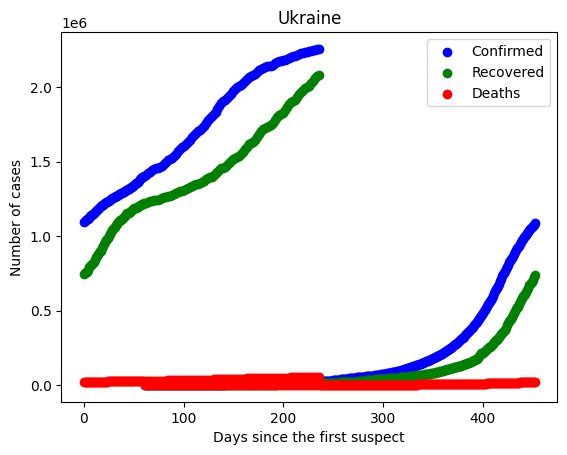

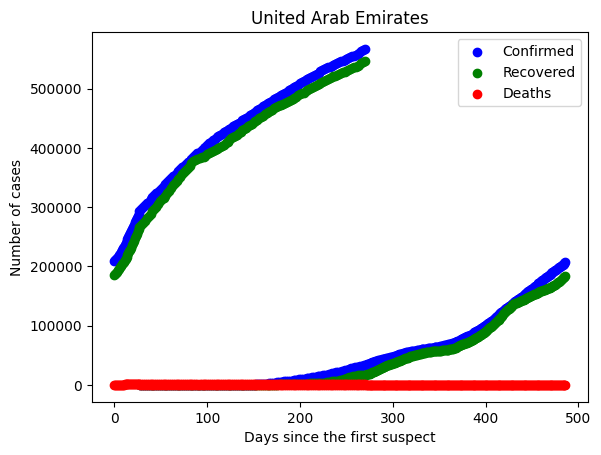

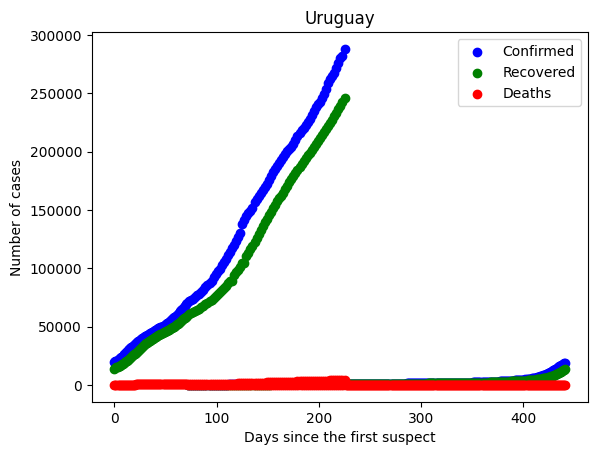

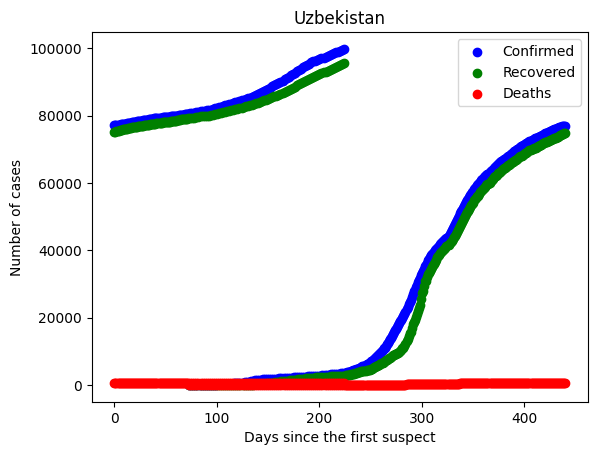

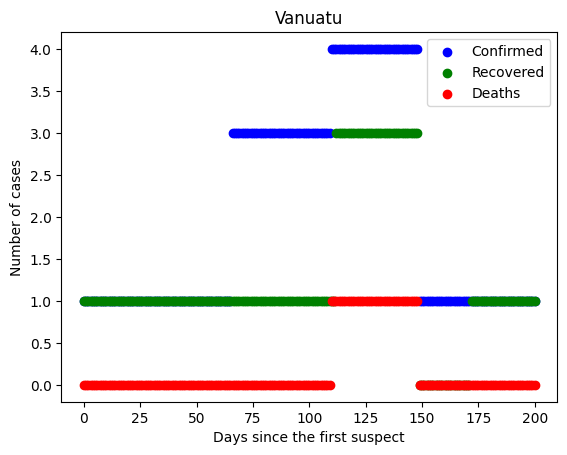

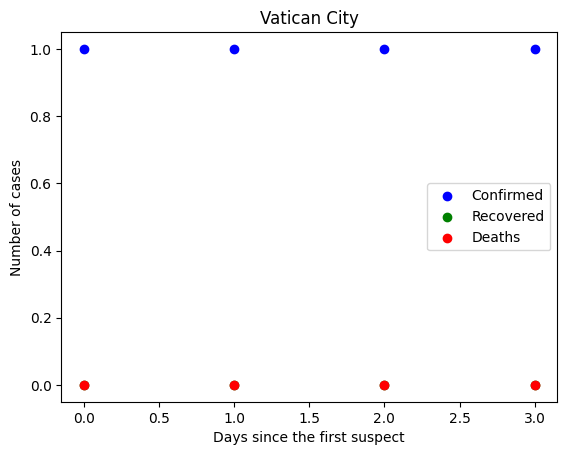

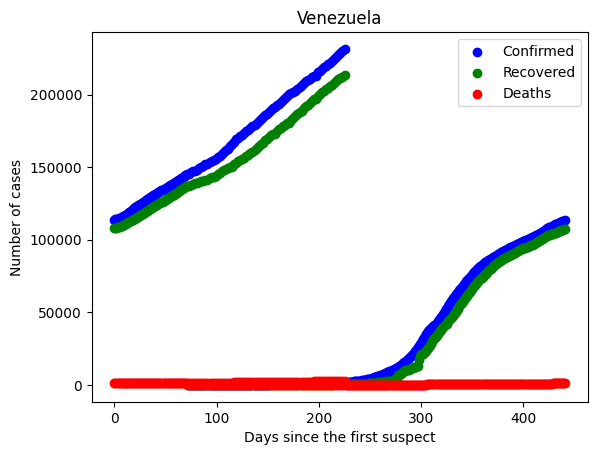

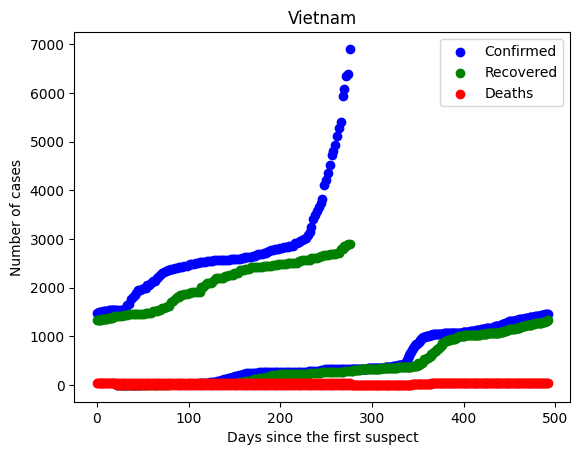

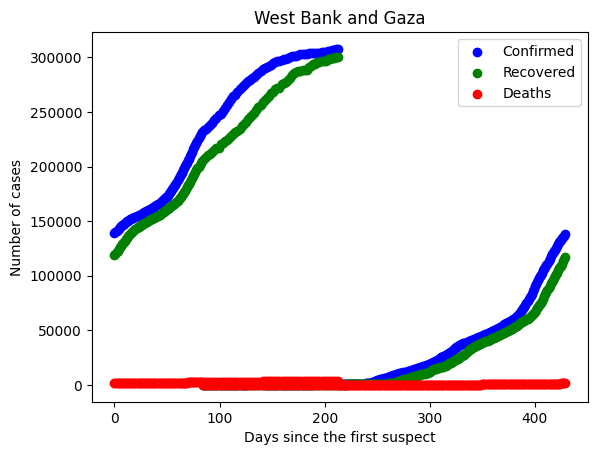

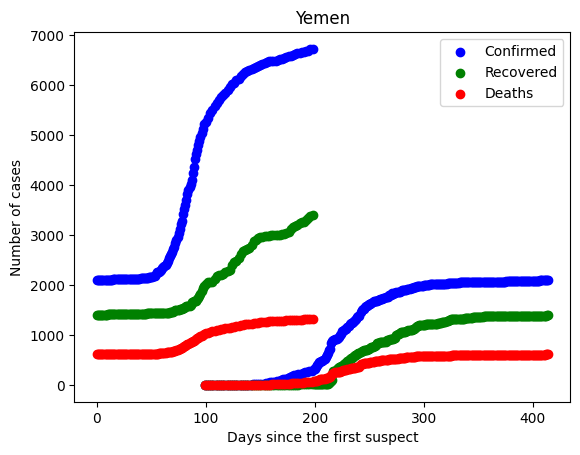

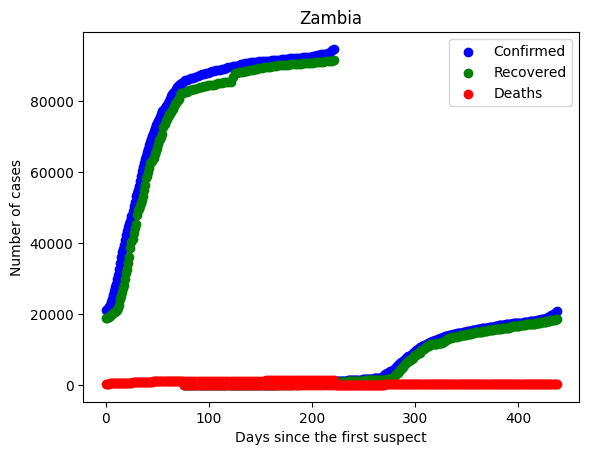

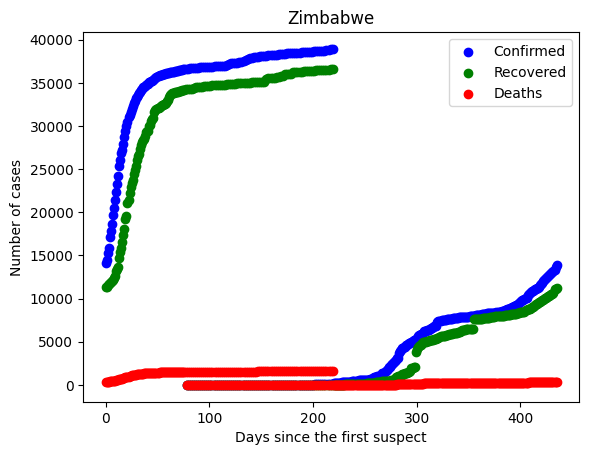

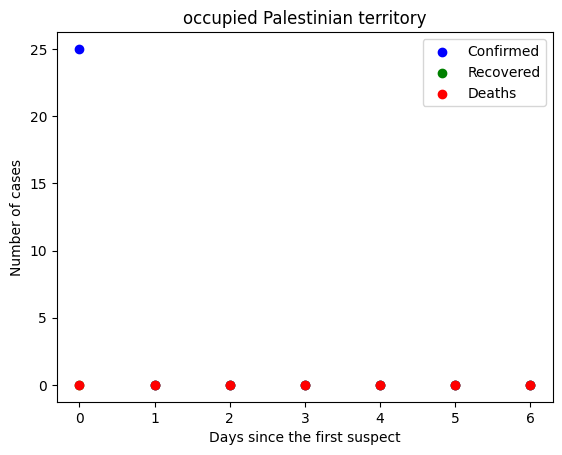

In [22]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()    